## Customer Churn Classification

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
#Loading the Dataset

df = pd.read_csv("telecommunications_churn (1).csv")
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [3]:
df.shape

(3333, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [5]:
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [6]:
df.drop_duplicates()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [7]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [8]:
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

<AxesSubplot:>

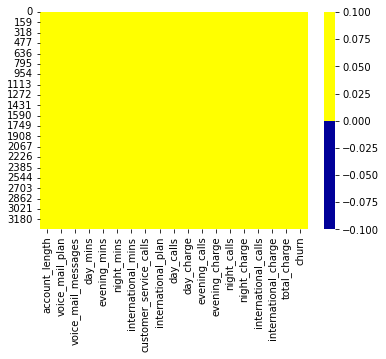

In [9]:
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

In [10]:
# sns.pairplot(df)

In [11]:
# Plot Distribution plot checking the data is normal or not
# plt.figure(figsize=(16,5))
# for column in df:
#     plt.figure()
#     sns.distplot(df[column])

Text(0.5, 1.0, 'Visualization of outliers')

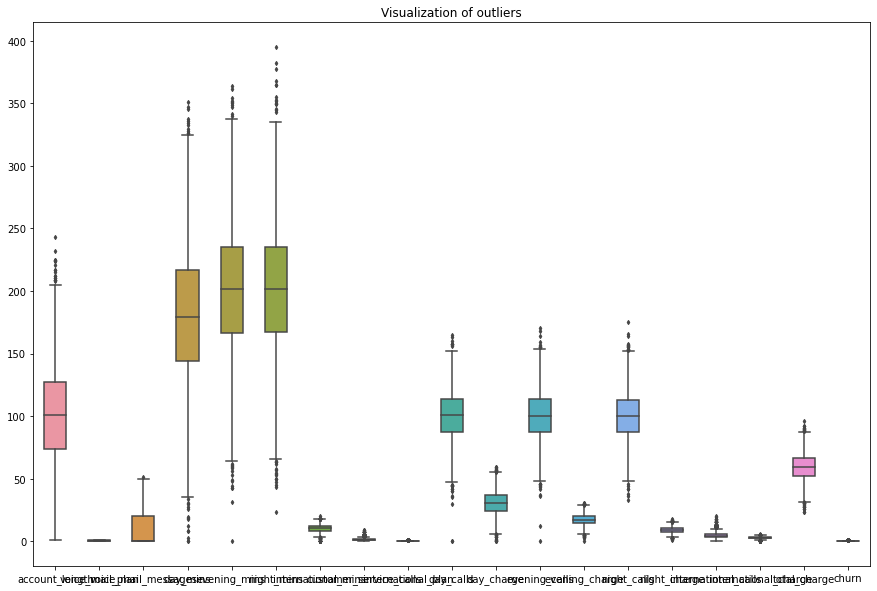

In [12]:
# Checking the existence of outliers using boxplots
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize = 3)
plt.title("Visualization of outliers") 

In [13]:
# import matplotlib.pyplot as plt

# for column in df:
#     plt.figure()
#     df.boxplot([column])

C:\Users\Harshada\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<Figure size 1152x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

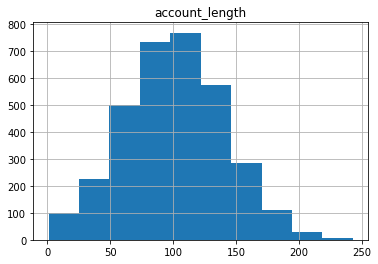

<Figure size 432x288 with 0 Axes>

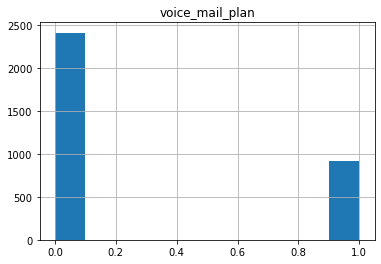

<Figure size 432x288 with 0 Axes>

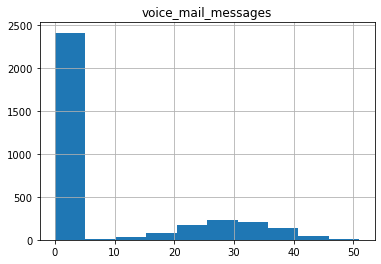

<Figure size 432x288 with 0 Axes>

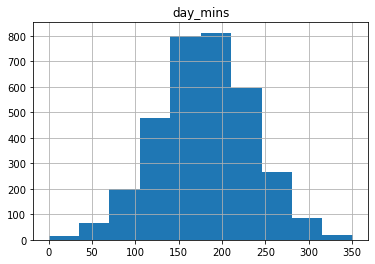

<Figure size 432x288 with 0 Axes>

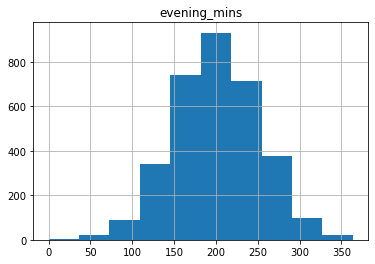

<Figure size 432x288 with 0 Axes>

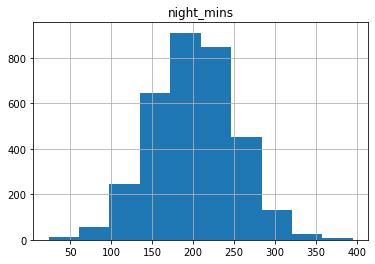

<Figure size 432x288 with 0 Axes>

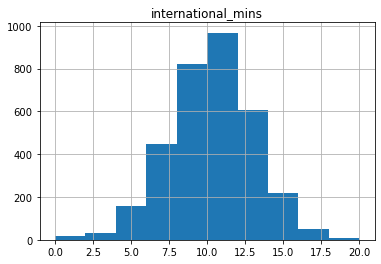

<Figure size 432x288 with 0 Axes>

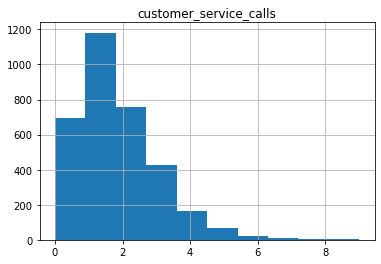

<Figure size 432x288 with 0 Axes>

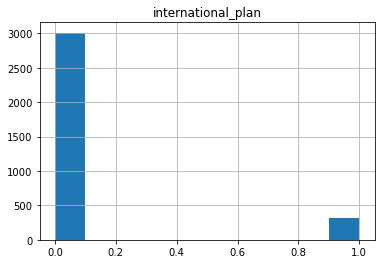

<Figure size 432x288 with 0 Axes>

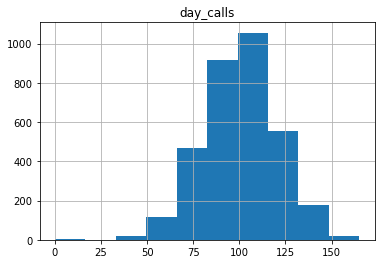

<Figure size 432x288 with 0 Axes>

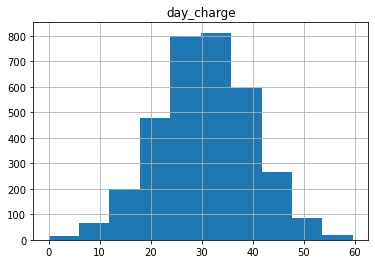

<Figure size 432x288 with 0 Axes>

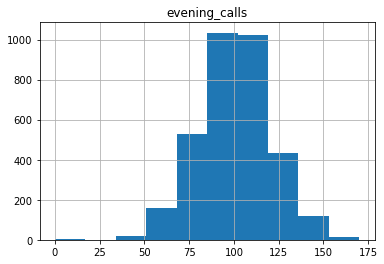

<Figure size 432x288 with 0 Axes>

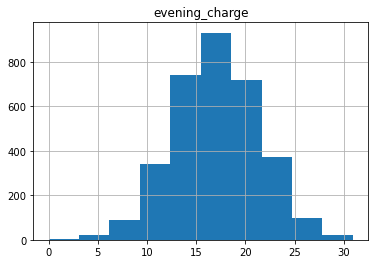

<Figure size 432x288 with 0 Axes>

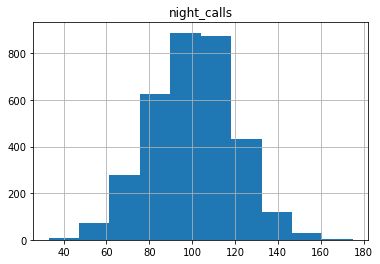

<Figure size 432x288 with 0 Axes>

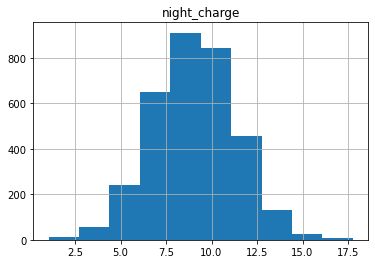

<Figure size 432x288 with 0 Axes>

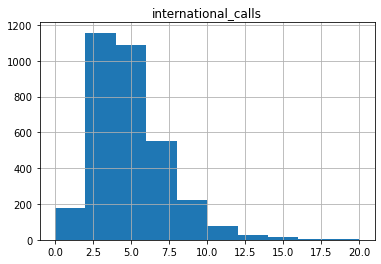

<Figure size 432x288 with 0 Axes>

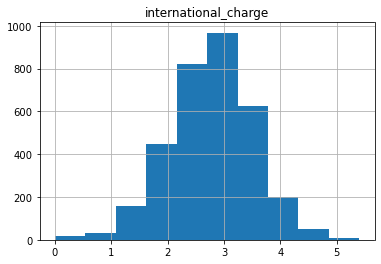

<Figure size 432x288 with 0 Axes>

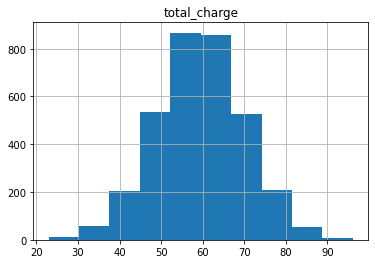

<Figure size 432x288 with 0 Axes>

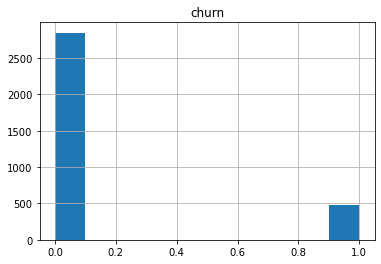

In [14]:
# Histogram
plt.figure(figsize=(16,5))
for column in df:
    plt.figure()
    df.hist([column])

<AxesSubplot:xlabel='churn', ylabel='count'>

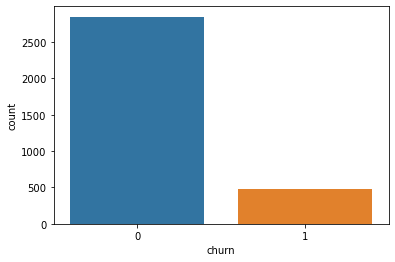

In [15]:
# Exploratory Data Analysis.
sns.countplot(x = 'churn', data = df)    

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

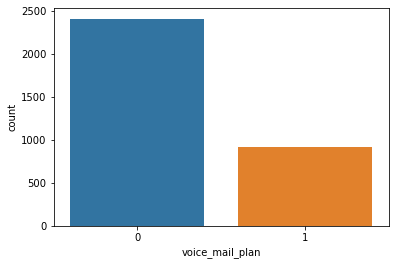

In [16]:
sns.countplot(x = 'voice_mail_plan', data = df)

<AxesSubplot:xlabel='international_plan', ylabel='count'>

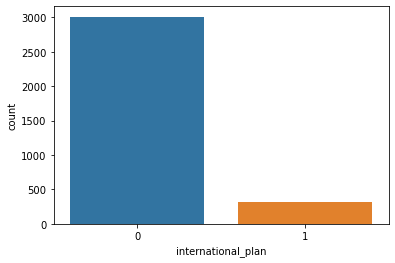

In [17]:
sns.countplot(x = 'international_plan', data = df)

In [18]:
mean = np.mean(df)
std = np.std(df)
print('mean of the dataset is', mean)
print('std. deviation is', std)


mean of the dataset is account_length            101.064806
voice_mail_plan             0.276628
voice_mail_messages         8.099010
day_mins                  179.775098
evening_mins              200.980348
night_mins                200.872037
international_mins         10.237294
customer_service_calls      1.562856
international_plan          0.096910
day_calls                 100.435644
day_charge                 30.562307
evening_calls             100.114311
evening_charge             17.083540
night_calls               100.107711
night_charge                9.039325
international_calls         4.479448
international_charge        2.764581
total_charge               59.449754
churn                       0.144914
dtype: float64
std. deviation is account_length            39.816132
voice_mail_plan            0.447331
voice_mail_messages       13.686312
day_mins                  54.459218
evening_mins              50.706236
night_mins                50.566260
international_mins       

# Outliers

# 1. Account Length Using Z-Score

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


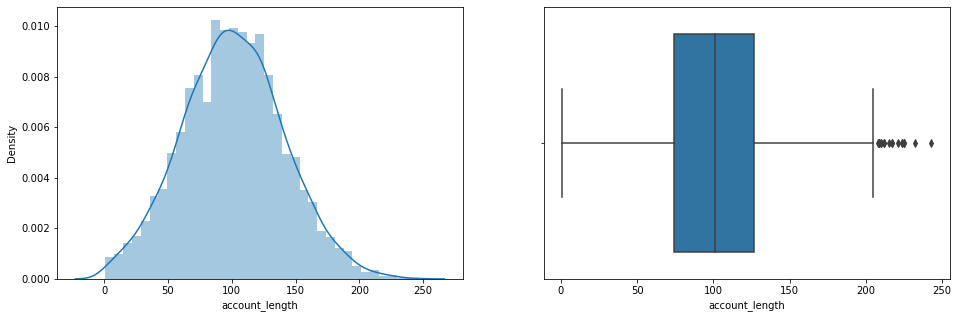

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["account_length"])

plt.subplot(1,2,2)
sns.boxplot(df["account_length"])

plt.show()

In [20]:
# Remove Outliers using z-score
print("Mean value of Account length",df["account_length"].mean())
print("std value of Account length",df["account_length"].std())
print("Max value of Account length",df["account_length"].max())
print("Min value of Account length",df["account_length"].min())

Mean value of Account length 101.06480648064806
std value of Account length 39.822105928595604
Max value of Account length 243
Min value of Account length 1


In [21]:
# Finding the boundry values
Highest_Value=print("Highest Value",df["account_length"].mean() + 3*df["account_length"].std())
Lowest_Value=print("Lowest Value",df["account_length"].mean() - 3*df["account_length"].std())

Highest Value 220.53112426643486
Lowest Value -18.401511305138754


In [22]:
# Finding the outliers
df[(df["account_length"] > Highest_Value)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


In [23]:
df[(df["account_length"] < Lowest_Value)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


In [24]:
# Trimming
new_df=df[(df["account_length"] < Highest_Value) & (df["account_length"] > Lowest_Value)]
new_df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


In [25]:
# Approach 2
# Calculating the Z-Score
df["account_length z-score"]=(df["account_length"]-df["account_length"].mean())/df["account_length"].std()

In [26]:
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0,0.676388
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0,0.149043
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0,0.902393
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0,-0.428526
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0,-0.654531


In [27]:
# Checking those outliers that are greater than 3
df[df["account_length z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score
416,224,0,0,171.5,160.0,212.4,5.0,1,1,99,29.16,103,13.60,102,9.56,2,1.35,53.67,1,3.087109
817,243,0,0,95.5,163.7,264.2,6.6,2,0,92,16.24,63,13.91,118,11.89,6,1.78,43.82,0,3.564231
1408,232,0,0,165.6,195.9,118.3,11.8,1,0,104,28.15,115,16.65,77,5.32,3,3.19,53.31,0,3.288003
1551,225,0,0,165.4,273.7,210.0,8.7,0,0,106,28.12,109,23.26,93,9.45,3,2.35,63.18,1,3.112221
1751,225,0,0,182.7,246.5,218.0,8.8,1,0,142,31.06,63,20.95,103,9.81,2,2.38,64.20,0,3.112221
1886,224,0,0,111.4,175.0,217.2,5.5,3,0,133,18.94,66,14.88,106,9.77,6,1.49,45.08,0,3.087109
3216,221,1,24,180.5,224.1,205.7,2.4,0,0,85,30.69,92,19.05,103,9.26,3,0.65,59.65,0,3.011774


In [28]:
# Checking those outliers that are less than -3
df[df["account_length z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score


In [29]:
outlier_Al=df[(df["account_length z-score"] > 3) | (df["account_length z-score"] < -3)]
print(outlier_Al.shape)
outlier_Al

(7, 20)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score
416,224,0,0,171.5,160.0,212.4,5.0,1,1,99,29.16,103,13.60,102,9.56,2,1.35,53.67,1,3.087109
817,243,0,0,95.5,163.7,264.2,6.6,2,0,92,16.24,63,13.91,118,11.89,6,1.78,43.82,0,3.564231
1408,232,0,0,165.6,195.9,118.3,11.8,1,0,104,28.15,115,16.65,77,5.32,3,3.19,53.31,0,3.288003
1551,225,0,0,165.4,273.7,210.0,8.7,0,0,106,28.12,109,23.26,93,9.45,3,2.35,63.18,1,3.112221
1751,225,0,0,182.7,246.5,218.0,8.8,1,0,142,31.06,63,20.95,103,9.81,2,2.38,64.20,0,3.112221
1886,224,0,0,111.4,175.0,217.2,5.5,3,0,133,18.94,66,14.88,106,9.77,6,1.49,45.08,0,3.087109
3216,221,1,24,180.5,224.1,205.7,2.4,0,0,85,30.69,92,19.05,103,9.26,3,0.65,59.65,0,3.011774


In [30]:
df.drop([416,817,1408,1551,1751,1886,3216], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0,0.676388
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0,0.149043
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0,0.902393
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0,-0.428526
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0,-0.654531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0,2.283536
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0,-0.830313
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0,-1.834780
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0,2.082642


# 2.voice_mail_messages Using IQR

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


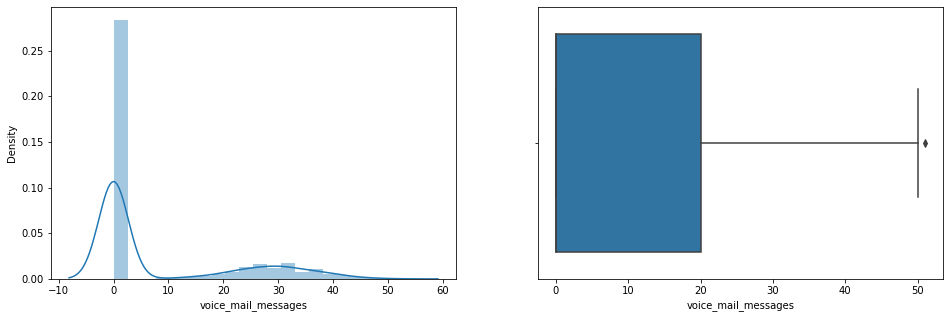

In [31]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["voice_mail_messages"])

plt.subplot(1,2,2)
sns.boxplot(df["voice_mail_messages"])

plt.show()

In [32]:
df["voice_mail_messages"].skew()

1.2632097325998832

In [33]:
# Finding IQR
Percentile25=df["voice_mail_messages"].quantile(0.25)
print("Percentile 25 :",Percentile25)
Percentile75=df["voice_mail_messages"].quantile(0.75)
print("Percentile 75 :",Percentile75)

Percentile 25 : 0.0
Percentile 75 : 20.0


In [34]:
iqr=Percentile75-Percentile25
print("IQR :",iqr)

IQR : 20.0


In [35]:
upper_limit=Percentile75+1.5*iqr
print("Upper Limit",upper_limit)
lower_limit=Percentile25-1.5*iqr
print("Lower Limit",lower_limit)

Upper Limit 50.0
Lower Limit -30.0


In [36]:
Ul=df[df["voice_mail_messages"]>upper_limit]
print(Ul.shape)
Ul

(1, 20)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score
845,144,1,51,283.9,192.0,196.3,10.0,1,0,98,48.26,109,16.32,85,8.83,4,2.7,76.11,0,1.078175


In [37]:
Ll=df[df["voice_mail_messages"]<lower_limit]
print(Ll.shape)
Ll

(0, 20)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score


In [38]:
outlier_Vmm=df[(df["voice_mail_messages"]>upper_limit ) | (df["voice_mail_messages"]<lower_limit)]
print(outlier_Vmm.shape)
outlier_Vmm

(1, 20)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score
845,144,1,51,283.9,192.0,196.3,10.0,1,0,98,48.26,109,16.32,85,8.83,4,2.7,76.11,0,1.078175


In [39]:
df.drop([845], axis=0, inplace=True)

# 3.Day Mins

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


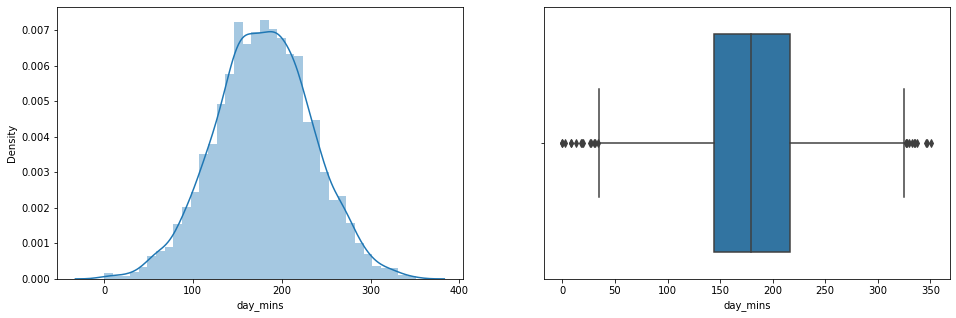

In [40]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["day_mins"])

plt.subplot(1,2,2)
sns.boxplot(df["day_mins"])

plt.show()

In [41]:
# Remove Outliers using z-score
print("Mean value of Day Mins",df["day_mins"].mean())
print("std value of Day Mins",df["day_mins"].std())
print("Max value of Day Mins",df["day_mins"].max())
print("Min value of Day Mins",df["day_mins"].min())

Mean value of Day Mins 179.79966917293248
std value of Day Mins 54.46912071258532
Max value of Day Mins 350.8
Min value of Day Mins 0.0


In [42]:
# Calculating the Z-Score
df["day_mins z-score"]=(df["day_mins"]-df["day_mins"].mean())/df["day_mins"].std()

In [43]:
# Checking those outliers that are greater than 3
df[df["day_mins z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score
365,154,0,0,350.8,216.5,253.9,10.1,1,0,75,...,94,18.40,100,11.43,9,2.73,92.20,1,1.329292,3.139400
985,64,0,0,346.8,249.5,275.4,13.3,1,1,55,...,79,21.21,102,12.39,9,3.59,96.15,1,-0.930760,3.065963
2594,115,0,0,345.3,203.4,217.5,11.8,1,1,81,...,106,17.29,107,9.79,8,3.19,88.97,1,0.349936,3.038425


In [44]:
# Checking those outliers that are less than -3
df[df["day_mins z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score
1052,98,0,0,12.5,256.6,169.4,7.7,1,1,67,...,90,21.81,88,7.62,9,2.08,33.64,0,-0.076962,-3.071459
1345,98,0,0,0.0,159.6,167.1,6.8,4,0,0,...,130,13.57,88,7.52,1,1.84,22.93,1,-0.076962,-3.300947
1397,101,0,0,0.0,192.1,168.8,7.2,1,0,0,...,119,16.33,95,7.60,4,1.94,25.87,0,-0.001627,-3.300947
1986,70,0,0,7.9,136.4,156.6,12.1,0,0,100,...,83,11.59,89,7.05,1,3.27,23.25,0,-0.780089,-3.155910
2736,127,1,27,2.6,254.0,242.7,9.2,3,0,113,...,102,21.59,156,10.92,5,2.48,35.43,0,0.651276,-3.253213
2753,134,0,0,7.8,171.4,186.5,12.9,2,0,86,...,100,14.57,80,8.39,2,3.48,27.77,0,0.827058,-3.157746


In [45]:
outlier_Dm=df[(df["day_mins z-score"] > 3) | (df["day_mins z-score"] < -3)]
print(outlier_Dm.shape)
outlier_Dm

(9, 21)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score
365,154,0,0,350.8,216.5,253.9,10.1,1,0,75,...,94,18.40,100,11.43,9,2.73,92.20,1,1.329292,3.139400
985,64,0,0,346.8,249.5,275.4,13.3,1,1,55,...,79,21.21,102,12.39,9,3.59,96.15,1,-0.930760,3.065963
1052,98,0,0,12.5,256.6,169.4,7.7,1,1,67,...,90,21.81,88,7.62,9,2.08,33.64,0,-0.076962,-3.071459
1345,98,0,0,0.0,159.6,167.1,6.8,4,0,0,...,130,13.57,88,7.52,1,1.84,22.93,1,-0.076962,-3.300947
1397,101,0,0,0.0,192.1,168.8,7.2,1,0,0,...,119,16.33,95,7.60,4,1.94,25.87,0,-0.001627,-3.300947
1986,70,0,0,7.9,136.4,156.6,12.1,0,0,100,...,83,11.59,89,7.05,1,3.27,23.25,0,-0.780089,-3.155910
2594,115,0,0,345.3,203.4,217.5,11.8,1,1,81,...,106,17.29,107,9.79,8,3.19,88.97,1,0.349936,3.038425
2736,127,1,27,2.6,254.0,242.7,9.2,3,0,113,...,102,21.59,156,10.92,5,2.48,35.43,0,0.651276,-3.253213
2753,134,0,0,7.8,171.4,186.5,12.9,2,0,86,...,100,14.57,80,8.39,2,3.48,27.77,0,0.827058,-3.157746


In [46]:
df.drop([365,985,1052,1345,1397,1986,2594,2736,2753], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,99,16.78,91,11.01,3,2.70,75.56,0,0.676388,1.566031
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,103,16.62,103,11.45,3,3.70,59.24,0,0.149043,-0.334128
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,110,10.30,104,7.32,5,3.29,62.29,0,0.902393,1.167640
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,88,5.26,89,8.86,7,1.78,66.80,0,-0.428526,2.195746
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,122,12.61,121,8.41,3,2.73,52.09,0,-0.654531,-0.240497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,126,18.32,83,12.56,6,2.67,60.10,0,2.283536,-0.433267
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,55,13.04,123,8.61,4,2.59,63.53,0,-0.830313,0.941824
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,58,24.55,91,8.64,6,3.81,67.74,0,-1.834780,0.018365
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,84,13.57,137,6.26,10,1.35,57.53,0,2.082642,0.624213


# 4.evening_mins

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


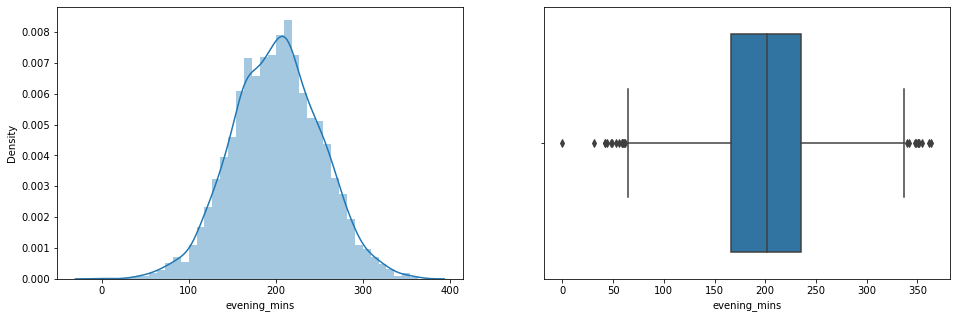

In [47]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["evening_mins"])

plt.subplot(1,2,2)
sns.boxplot(df["evening_mins"])

plt.show()

In [48]:
# Remove Outliers using z-score
print("Mean value of evening_mins",df["evening_mins"].mean())
print("std value of evening_mins",df["evening_mins"].std())
print("Max value of evening_mins",df["evening_mins"].max())
print("Min value of evening_mins",df["evening_mins"].min())

Mean value of evening_mins 200.96414354644145
std value of evening_mins 50.76329099278925
Max value of evening_mins 363.7
Min value of evening_mins 0.0


In [49]:
# Calculating the Z-Score
df["evening_mins z-score"]=(df["evening_mins"]-df["evening_mins"].mean())/df["evening_mins"].std()

In [50]:
# Checking those outliers that are greater than 3
df[df["evening_mins z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score
2331,46,1,34,191.4,361.8,147.5,7.2,1,0,102,...,30.75,132,6.64,2,1.94,71.87,0,-1.382770,0.212971,3.168350
2551,102,0,0,129.5,354.2,145.5,10.9,1,0,56,...,30.11,93,6.55,3,2.94,61.62,0,0.023484,-0.923453,3.018635
2732,130,0,0,216.2,363.7,126.7,16.9,5,1,106,...,30.91,123,5.70,2,4.56,77.92,1,0.726611,0.668275,3.205778


In [51]:
# Checking those outliers that are less than -3
df[df["evening_mins z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score
32,172,0,0,212.0,31.2,293.3,12.6,3,0,121,...,2.65,78,13.20,10,3.40,55.29,0,1.781302,0.591167,-3.344230
533,125,1,36,201.3,42.2,125.7,5.4,1,0,117,...,3.59,104,5.66,3,1.46,44.93,0,0.601053,0.394725,-3.127538
821,80,0,0,105.8,43.9,189.6,13.1,0,0,110,...,3.73,87,8.53,5,3.54,33.79,0,-0.528973,-1.358562,-3.094050
889,103,0,0,198.5,42.5,179.2,12.4,0,0,112,...,3.61,124,8.06,5,3.35,48.77,0,0.048596,0.343320,-3.121629
1233,48,0,0,128.2,48.1,116.3,8.9,0,0,71,...,4.09,80,5.23,3,2.40,33.51,0,-1.332546,-0.947320,-3.011313
2932,97,0,0,209.2,0.0,175.4,11.8,1,0,134,...,0.00,94,7.89,6,3.19,46.64,0,-0.102074,0.539761,-3.958848


In [52]:
outlier_Em=df[(df["evening_mins z-score"] > 3) | (df["evening_mins z-score"] < -3)]
print(outlier_Em.shape)
outlier_Em

(9, 22)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score
32,172,0,0,212.0,31.2,293.3,12.6,3,0,121,...,2.65,78,13.20,10,3.40,55.29,0,1.781302,0.591167,-3.344230
533,125,1,36,201.3,42.2,125.7,5.4,1,0,117,...,3.59,104,5.66,3,1.46,44.93,0,0.601053,0.394725,-3.127538
821,80,0,0,105.8,43.9,189.6,13.1,0,0,110,...,3.73,87,8.53,5,3.54,33.79,0,-0.528973,-1.358562,-3.094050
889,103,0,0,198.5,42.5,179.2,12.4,0,0,112,...,3.61,124,8.06,5,3.35,48.77,0,0.048596,0.343320,-3.121629
1233,48,0,0,128.2,48.1,116.3,8.9,0,0,71,...,4.09,80,5.23,3,2.40,33.51,0,-1.332546,-0.947320,-3.011313
2331,46,1,34,191.4,361.8,147.5,7.2,1,0,102,...,30.75,132,6.64,2,1.94,71.87,0,-1.382770,0.212971,3.168350
2551,102,0,0,129.5,354.2,145.5,10.9,1,0,56,...,30.11,93,6.55,3,2.94,61.62,0,0.023484,-0.923453,3.018635
2732,130,0,0,216.2,363.7,126.7,16.9,5,1,106,...,30.91,123,5.70,2,4.56,77.92,1,0.726611,0.668275,3.205778
2932,97,0,0,209.2,0.0,175.4,11.8,1,0,134,...,0.00,94,7.89,6,3.19,46.64,0,-0.102074,0.539761,-3.958848


In [53]:
df.drop([32,533,821,889,1233,2331,2551,2732,2932], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,16.78,91,11.01,3,2.70,75.56,0,0.676388,1.566031,-0.070211
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,16.62,103,11.45,3,3.70,59.24,0,0.149043,-0.334128,-0.107640
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,10.30,104,7.32,5,3.29,62.29,0,0.902393,1.167640,-1.571296
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,5.26,89,8.86,7,1.78,66.80,0,-0.428526,2.195746,-2.739463
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,12.61,121,8.41,3,2.73,52.09,0,-0.654531,-0.240497,-1.037445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,18.32,83,12.56,6,2.67,60.10,0,2.283536,-0.433267,0.286346
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,13.04,123,8.61,4,2.59,63.53,0,-0.830313,0.941824,-0.936979
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,24.55,91,8.64,6,3.81,67.74,0,-1.834780,0.018365,1.730303
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,13.57,137,6.26,10,1.35,57.53,0,2.082642,0.624213,-0.814844


# 5.night_mins

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


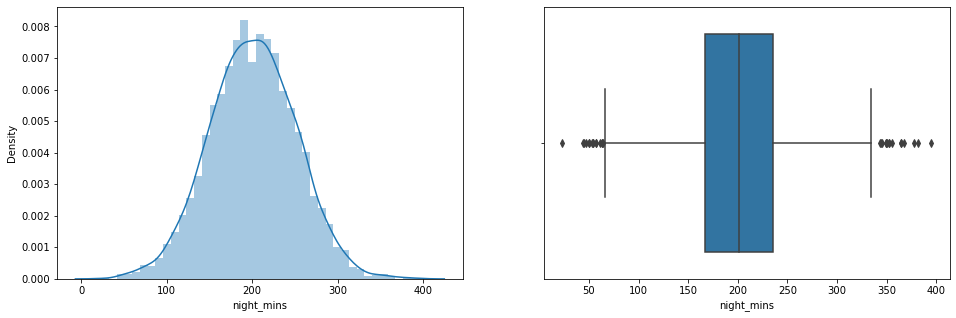

In [54]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["night_mins"])

plt.subplot(1,2,2)
sns.boxplot(df["night_mins"])

plt.show()

In [55]:
# Remove Outliers using z-score
print("Mean value of night_mins",df["night_mins"].mean())
print("std value of night_mins",df["night_mins"].std())
print("Max value of night_mins",df["night_mins"].max())
print("Min value of night_mins",df["night_mins"].min())

Mean value of night_mins 200.94566071968566
std value of night_mins 50.58911744397438
Max value of night_mins 395.0
Min value of night_mins 23.2


In [56]:
# Calculating the Z-Score
df["night_mins z-score"]=(df["night_mins"]-df["night_mins"].mean())/df["night_mins"].std()

In [57]:
# Checking those outliers that are greater than 3
df[df["night_mins z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score
244,108,0,0,198.5,267.8,354.9,9.4,0,0,99,...,75,15.97,3,2.54,75.02,1,0.174154,0.343320,1.316618,3.043230
922,80,0,0,239.9,142.3,364.3,9.3,1,0,121,...,106,16.39,5,2.51,71.78,0,-0.528973,1.103384,-1.155641,3.229041
1317,89,1,29,163.5,274.8,381.9,7.5,2,0,80,...,147,17.19,5,2.03,70.38,0,-0.302968,-0.299246,1.454513,3.576942
1445,55,1,8,222.5,171.5,377.5,9.7,1,0,104,...,114,16.99,2,2.62,72.02,0,-1.156765,0.783936,-0.580422,3.489967
2321,153,0,0,154.6,263.0,367.7,15.5,1,0,56,...,89,16.55,2,4.19,69.38,0,1.304180,-0.462641,1.222061,3.296249
2663,172,0,0,169.8,183.1,395.0,12.7,2,0,123,...,72,17.77,7,3.43,65.63,0,1.781302,-0.183584,-0.351911,3.835891
3107,73,0,0,157.6,198.3,364.9,9.1,1,0,92,...,106,16.42,4,2.46,62.53,0,-0.704754,-0.407564,-0.052482,3.240901


In [58]:
# Checking those outliers that are less than -3
df[df["night_mins z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score
883,42,0,0,146.3,255.9,45.0,8.0,1,0,84,...,117,2.03,12,2.16,50.81,0,-1.483217,-0.615021,1.082197,-3.082593
1113,152,0,0,206.3,292.8,43.7,10.6,1,0,98,...,121,1.97,4,2.86,64.79,0,1.279068,0.486520,1.809100,-3.108290
1260,76,1,22,160.1,168.7,23.2,9.5,3,0,107,...,102,1.04,4,2.57,45.17,0,-0.629419,-0.361667,-0.635580,-3.513516
3247,146,0,0,138.4,158.9,47.4,3.9,4,0,104,...,73,2.13,9,1.05,40.22,1,1.128398,-0.760058,-0.828633,-3.035152


In [59]:
outlier_Nm=df[(df["night_mins z-score"] > 3) | (df["night_mins z-score"] < -3)]
print(outlier_Nm.shape)
outlier_Nm

(11, 23)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score
244,108,0,0,198.5,267.8,354.9,9.4,0,0,99,...,75,15.97,3,2.54,75.02,1,0.174154,0.343320,1.316618,3.043230
883,42,0,0,146.3,255.9,45.0,8.0,1,0,84,...,117,2.03,12,2.16,50.81,0,-1.483217,-0.615021,1.082197,-3.082593
922,80,0,0,239.9,142.3,364.3,9.3,1,0,121,...,106,16.39,5,2.51,71.78,0,-0.528973,1.103384,-1.155641,3.229041
1113,152,0,0,206.3,292.8,43.7,10.6,1,0,98,...,121,1.97,4,2.86,64.79,0,1.279068,0.486520,1.809100,-3.108290
1260,76,1,22,160.1,168.7,23.2,9.5,3,0,107,...,102,1.04,4,2.57,45.17,0,-0.629419,-0.361667,-0.635580,-3.513516
1317,89,1,29,163.5,274.8,381.9,7.5,2,0,80,...,147,17.19,5,2.03,70.38,0,-0.302968,-0.299246,1.454513,3.576942
1445,55,1,8,222.5,171.5,377.5,9.7,1,0,104,...,114,16.99,2,2.62,72.02,0,-1.156765,0.783936,-0.580422,3.489967
2321,153,0,0,154.6,263.0,367.7,15.5,1,0,56,...,89,16.55,2,4.19,69.38,0,1.304180,-0.462641,1.222061,3.296249
2663,172,0,0,169.8,183.1,395.0,12.7,2,0,123,...,72,17.77,7,3.43,65.63,0,1.781302,-0.183584,-0.351911,3.835891
3107,73,0,0,157.6,198.3,364.9,9.1,1,0,92,...,106,16.42,4,2.46,62.53,0,-0.704754,-0.407564,-0.052482,3.240901


In [60]:
df.drop([244,922,883,1113,1260,1317,1445,2321,2663,3107,3247], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_calls,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,91,11.01,3,2.70,75.56,0,0.676388,1.566031,-0.070211,0.864896
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,103,11.45,3,3.70,59.24,0,0.149043,-0.334128,-0.107640,1.056637
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,104,7.32,5,3.29,62.29,0,0.902393,1.167640,-1.571296,-0.757982
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,89,8.86,7,1.78,66.80,0,-0.428526,2.195746,-2.739463,-0.079971
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,121,8.41,3,2.73,52.09,0,-0.654531,-0.240497,-1.037445,-0.277642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,83,12.56,6,2.67,60.10,0,2.283536,-0.433267,0.286346,1.544884
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,123,8.61,4,2.59,63.53,0,-0.830313,0.941824,-0.936979,-0.190667
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,91,8.64,6,3.81,67.74,0,-1.834780,0.018365,1.730303,-0.178806
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,137,6.26,10,1.35,57.53,0,2.082642,0.624213,-0.814844,-1.220532


# 6.international_mins

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


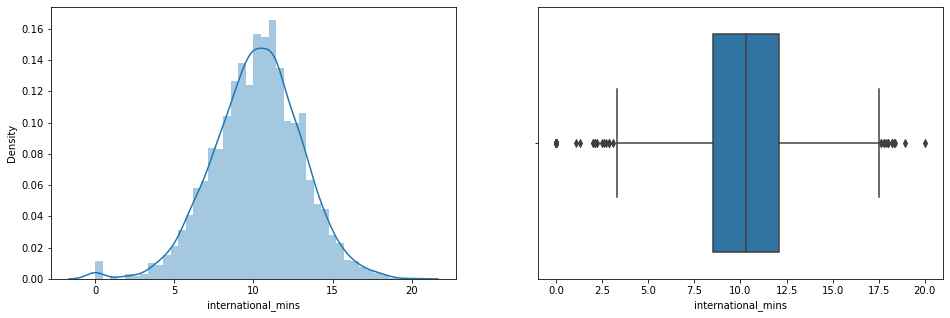

In [61]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["international_mins"])

plt.subplot(1,2,2)
sns.boxplot(df["international_mins"])

plt.show()

In [62]:
# Remove Outliers using z-score
print("Mean value of international_mins",df["international_mins"].mean())
print("std value of international_mins",df["international_mins"].std())
print("Max value of international_mins",df["international_mins"].max())
print("Min value of international_mins",df["international_mins"].min())

Mean value of international_mins 10.244720873786408
std value of international_mins 2.7872377776023045
Max value of international_mins 20.0
Min value of international_mins 0.0


In [63]:
# Calculating the Z-Score
df["international_mins z-score"]=(df["night_mins"]-df["international_mins"].mean())/df["international_mins"].std()

In [64]:
# Checking those outliers that are greater than 3
df[df["international_mins z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,11.01,3,2.70,75.56,0,0.676388,1.566031,-0.070211,0.864896,84.117430
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,11.45,3,3.70,59.24,0,0.149043,-0.334128,-0.107640,1.056637,87.597578
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,7.32,5,3.29,62.29,0,0.902393,1.167640,-1.571296,-0.757982,54.661744
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,8.86,7,1.78,66.80,0,-0.428526,2.195746,-2.739463,-0.079971,66.967835
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,8.41,3,2.73,52.09,0,-0.654531,-0.240497,-1.037445,-0.277642,63.380053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,12.56,6,2.67,60.10,0,2.283536,-0.433267,0.286346,1.544884,96.459398
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,8.61,4,2.59,63.53,0,-0.830313,0.941824,-0.936979,-0.190667,64.958677
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,8.64,6,3.81,67.74,0,-1.834780,0.018365,1.730303,-0.178806,65.173944
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,6.26,10,1.35,57.53,0,2.082642,0.624213,-0.814844,-1.220532,46.266336


In [65]:
# Checking those outliers that are less than -3
df[df["international_mins z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score


In [66]:
outlier_Im=df[(df["international_mins z-score"] > 3) | (df["international_mins z-score"] < -3)]
print(outlier_Im.shape)
outlier_Im

(3296, 24)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,11.01,3,2.70,75.56,0,0.676388,1.566031,-0.070211,0.864896,84.117430
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,11.45,3,3.70,59.24,0,0.149043,-0.334128,-0.107640,1.056637,87.597578
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,7.32,5,3.29,62.29,0,0.902393,1.167640,-1.571296,-0.757982,54.661744
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,8.86,7,1.78,66.80,0,-0.428526,2.195746,-2.739463,-0.079971,66.967835
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,8.41,3,2.73,52.09,0,-0.654531,-0.240497,-1.037445,-0.277642,63.380053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,12.56,6,2.67,60.10,0,2.283536,-0.433267,0.286346,1.544884,96.459398
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,8.61,4,2.59,63.53,0,-0.830313,0.941824,-0.936979,-0.190667,64.958677
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,8.64,6,3.81,67.74,0,-1.834780,0.018365,1.730303,-0.178806,65.173944
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,6.26,10,1.35,57.53,0,2.082642,0.624213,-0.814844,-1.220532,46.266336


In [67]:
df.drop([3328,3329,3330,3332,3331], axis=0, inplace=True)

# 7.customer_service_calls

In [68]:
df["customer_service_calls"].skew()

1.0918709853706134

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


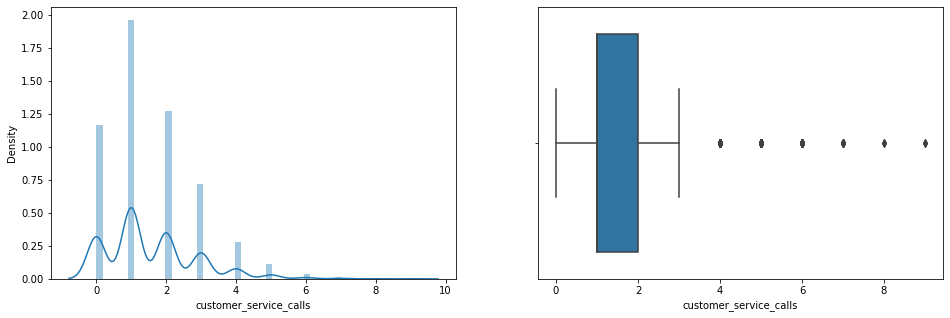

In [69]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["customer_service_calls"])

plt.subplot(1,2,2)
sns.boxplot(df["customer_service_calls"])

plt.show()

In [70]:
# Finding IQR
Percentile25=df["customer_service_calls"].quantile(0.25)
print("Percentile 25 :",Percentile25)
Percentile75=df["customer_service_calls"].quantile(0.75)
print("Percentile 75 :",Percentile75)

Percentile 25 : 1.0
Percentile 75 : 2.0


In [71]:
iqr=Percentile75-Percentile25
print("IQR :",iqr)

IQR : 1.0


In [72]:
upper_limit=Percentile75+1.5*iqr
print("Upper Limit",upper_limit)
lower_limit=Percentile25-1.5*iqr
print("Lower Limit",lower_limit)

Upper Limit 3.5
Lower Limit -0.5


In [73]:
Ul=df[df["customer_service_calls"]>upper_limit]
Ul.shape

(264, 24)

In [74]:
Ll=df[df["customer_service_calls"]<lower_limit]
Ll.shape

(0, 24)

In [75]:
outlier_Csc=df[(df["customer_service_calls"]>upper_limit ) | (df["customer_service_calls"]<lower_limit)]
print(outlier_Csc.shape)
outlier_Csc

(264, 24)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score
10,65,0,0,129.1,228.5,208.8,12.7,4,0,137,...,9.40,6,3.43,54.20,1,-0.905648,-0.930797,0.542436,0.155257,71.237295
14,62,0,0,120.7,307.2,203.0,13.1,4,0,70,...,9.14,6,3.54,59.31,0,-0.980983,-1.085012,2.092769,0.040608,69.156382
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,...,7.23,9,1.46,92.29,1,1.505073,2.810773,2.301582,-0.797517,53.944188
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,...,9.43,6,1.54,36.02,1,-0.604308,-2.155344,-0.611941,0.171071,71.524317
48,119,0,0,159.1,231.3,143.2,8.8,5,0,114,...,6.44,3,2.38,55.53,1,0.450383,-0.380026,0.597594,-1.141464,47.701448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,172,0,0,203.9,234.0,160.7,17.8,4,0,109,...,7.23,4,4.81,66.59,0,1.781302,0.442459,0.650782,-0.795540,53.980066
3309,100,0,0,219.4,225.7,255.3,12.0,4,1,112,...,11.49,4,3.24,71.21,0,-0.026739,0.727024,0.487278,1.074428,87.920479
3320,122,0,0,140.0,196.4,120.1,9.7,4,1,101,...,5.40,4,2.62,48.51,1,0.525718,-0.730683,-0.089910,-1.598084,39.413673
3322,62,0,0,321.1,265.5,180.5,11.5,4,0,105,...,8.12,2,3.11,88.39,1,-0.980983,2.594136,1.271310,-0.404151,61.083873


In [76]:
df.drop([3307,3309,3320,3322,3323], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,11.01,3,2.70,75.56,0,0.676388,1.566031,-0.070211,0.864896,84.117430
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,11.45,3,3.70,59.24,0,0.149043,-0.334128,-0.107640,1.056637,87.597578
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,7.32,5,3.29,62.29,0,0.902393,1.167640,-1.571296,-0.757982,54.661744
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,8.86,7,1.78,66.80,0,-0.428526,2.195746,-2.739463,-0.079971,66.967835
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,8.41,3,2.73,52.09,0,-0.654531,-0.240497,-1.037445,-0.277642,63.380053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,60,0,0,193.9,85.0,210.1,13.2,3,0,118,...,9.45,8,3.56,53.20,0,-1.031206,0.258868,-2.284409,0.180955,71.703706
3324,159,0,0,169.8,197.7,193.7,11.6,1,0,114,...,8.72,4,3.13,57.52,0,1.454850,-0.183584,-0.064301,-0.143226,65.819745
3325,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,10.95,4,2.51,56.28,0,-0.579196,0.249689,-1.656003,0.837222,83.615141
3326,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,8.05,7,4.02,54.40,0,-0.127186,-1.343875,1.651506,-0.435779,60.509828


# 8.international_plan

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


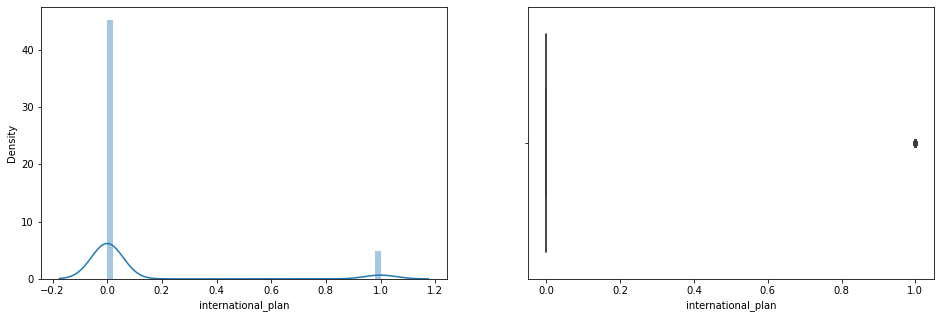

In [77]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["international_plan"])

plt.subplot(1,2,2)
sns.boxplot(df["international_plan"])

plt.show()

In [78]:
# Finding IQR
Percentile25=df["international_plan"].quantile(0.25)
print("Percentile 25 :",Percentile25)
Percentile75=df["international_plan"].quantile(0.75)
print("Percentile 75 :",Percentile75)

Percentile 25 : 0.0
Percentile 75 : 0.0


In [79]:
iqr=Percentile75-Percentile25
print("IQR :",iqr)

IQR : 0.0


In [80]:
upper_limit=Percentile75+1.5*iqr
print("Upper Limit",upper_limit)
lower_limit=Percentile25-1.5*iqr
print("Lower Limit",lower_limit)

Upper Limit 0.0
Lower Limit 0.0


In [81]:
Ul=df[df["international_plan"]>upper_limit]
Ul.shape

(315, 24)

In [82]:
Ll=df[df["international_plan"]<lower_limit]
Ll.shape

(0, 24)

In [83]:
outlier_Csc=df[(df["international_plan"]>upper_limit ) | (df["international_plan"]<lower_limit)]
print(outlier_Csc.shape)
outlier_Csc

(315, 24)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_charge,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,8.86,7,1.78,66.80,0,-0.428526,2.195746,-2.739463,-0.079971,66.967835
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,8.41,3,2.73,52.09,0,-0.654531,-0.240497,-1.037445,-0.277642,63.380053
5,118,0,0,223.4,220.6,203.9,6.3,0,1,98,...,9.18,6,1.70,67.61,0,0.425271,0.800460,0.386812,0.058399,69.479282
7,147,0,0,157.0,103.1,211.8,7.1,0,1,79,...,9.53,6,1.92,46.90,0,1.153510,-0.418580,-1.927853,0.214559,72.313629
9,141,1,37,258.6,222.0,326.4,11.2,0,1,84,...,14.69,5,3.02,80.54,0,1.002840,1.446697,0.414391,2.479868,113.429605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,117,0,0,198.4,249.5,162.8,10.5,1,1,121,...,7.33,5,2.84,65.11,0,0.400159,0.341484,0.956121,-0.754029,54.733500
3291,119,1,22,172.1,223.6,150.0,13.9,1,1,119,...,6.75,20,3.75,58.77,1,0.450383,-0.141358,0.445910,-1.007048,50.141140
3302,75,0,0,153.2,210.8,153.5,7.8,1,1,78,...,6.91,3,2.11,52.98,0,-0.654531,-0.488344,0.193759,-0.937863,51.396863
3304,71,0,0,186.1,198.6,206.5,13.8,4,1,114,...,9.29,5,3.73,61.54,1,-0.754978,0.115668,-0.046572,0.109793,70.412105


# 9.day_calls

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


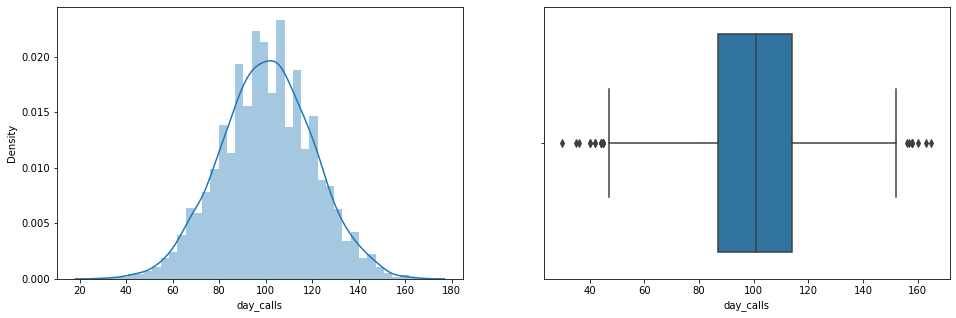

In [84]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["day_calls"])

plt.subplot(1,2,2)
sns.boxplot(df["day_calls"])

plt.show()

In [85]:
# Remove Outliers using z-score
print("Mean value of day_calls",df["day_calls"].mean())
print("std value of day_calls",df["day_calls"].std())
print("Max value of day_calls",df["day_calls"].max())
print("Min value of day_calls",df["day_calls"].min())

Mean value of day_calls 100.51886792452831
std value of day_calls 19.907459652831793
Max value of day_calls 165
Min value of day_calls 30


In [86]:
# Calculating the Z-Score
df["day_calls z-score"]=(df["day_calls"]-df["day_calls"].mean())/df["day_calls"].std()

In [87]:
# Checking those outliers that are greater than 3
df[df["day_calls z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score
468,86,1,32,70.9,166.7,244.9,11.1,3,0,163,...,5,3.00,40.24,0,-0.378303,-1.999292,-0.674979,0.868850,84.189186,3.138579
1121,91,0,0,154.4,168.3,239.9,11.7,5,0,165,...,4,3.16,54.52,1,-0.252744,-0.466313,-0.643460,0.770014,82.395295,3.239044


In [88]:
# Checking those outliers that are less than -3
df[df["day_calls z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score
692,82,0,0,185.8,276.5,192.1,5.7,4,0,36,...,7,1.54,65.27,0,-0.478749,0.110160,1.488002,-0.174853,65.245700,-3.240939
740,67,1,20,230.6,189.1,162.2,9.4,1,0,40,...,2,2.54,65.11,0,-0.855425,0.932645,-0.233715,-0.765889,54.518233,-3.040010
1144,155,0,0,216.7,144.3,135.3,10.8,2,0,30,...,1,2.92,58.12,0,1.354403,0.677454,-1.116243,-1.297624,44.867101,-3.542334
1989,124,1,30,144.5,262.3,226.5,12.0,2,0,35,...,7,3.24,60.30,0,0.575941,-0.648068,1.208272,0.505135,77.587668,-3.291172
3187,58,1,39,211.9,274.4,210.5,5.4,1,0,40,...,4,1.46,70.27,0,-1.081430,0.589331,1.446633,0.188862,71.847218,-3.040010


In [89]:
outlier_Dca=df[(df["day_calls z-score"] > 3) | (df["day_calls z-score"] < -3)]
print(outlier_Dca.shape)
outlier_Dca

(7, 25)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score
468,86,1,32,70.9,166.7,244.9,11.1,3,0,163,...,5,3.00,40.24,0,-0.378303,-1.999292,-0.674979,0.868850,84.189186,3.138579
692,82,0,0,185.8,276.5,192.1,5.7,4,0,36,...,7,1.54,65.27,0,-0.478749,0.110160,1.488002,-0.174853,65.245700,-3.240939
740,67,1,20,230.6,189.1,162.2,9.4,1,0,40,...,2,2.54,65.11,0,-0.855425,0.932645,-0.233715,-0.765889,54.518233,-3.040010
1121,91,0,0,154.4,168.3,239.9,11.7,5,0,165,...,4,3.16,54.52,1,-0.252744,-0.466313,-0.643460,0.770014,82.395295,3.239044
1144,155,0,0,216.7,144.3,135.3,10.8,2,0,30,...,1,2.92,58.12,0,1.354403,0.677454,-1.116243,-1.297624,44.867101,-3.542334
1989,124,1,30,144.5,262.3,226.5,12.0,2,0,35,...,7,3.24,60.30,0,0.575941,-0.648068,1.208272,0.505135,77.587668,-3.291172
3187,58,1,39,211.9,274.4,210.5,5.4,1,0,40,...,4,1.46,70.27,0,-1.081430,0.589331,1.446633,0.188862,71.847218,-3.040010


In [90]:
df.drop([468,692,740,1121,1144,1989,3187], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_calls,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,3,2.70,75.56,0,0.676388,1.566031,-0.070211,0.864896,84.117430,0.476260
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,3,3.70,59.24,0,0.149043,-0.334128,-0.107640,1.056637,87.597578,1.129282
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,5,3.29,62.29,0,0.902393,1.167640,-1.571296,-0.757982,54.661744,0.677190
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,7,1.78,66.80,0,-0.428526,2.195746,-2.739463,-0.079971,66.967835,-1.482804
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,3,2.73,52.09,0,-0.654531,-0.240497,-1.037445,-0.277642,63.380053,0.626958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,60,0,0,193.9,85.0,210.1,13.2,3,0,118,...,8,3.56,53.20,0,-1.031206,0.258868,-2.284409,0.180955,71.703706,0.878120
3324,159,0,0,169.8,197.7,193.7,11.6,1,0,114,...,4,3.13,57.52,0,1.454850,-0.183584,-0.064301,-0.143226,65.819745,0.677190
3325,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,4,2.51,56.28,0,-0.579196,0.249689,-1.656003,0.837222,83.615141,-0.076296
3326,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,7,4.02,54.40,0,-0.127186,-1.343875,1.651506,-0.435779,60.509828,1.380444


# 10.day_charge

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


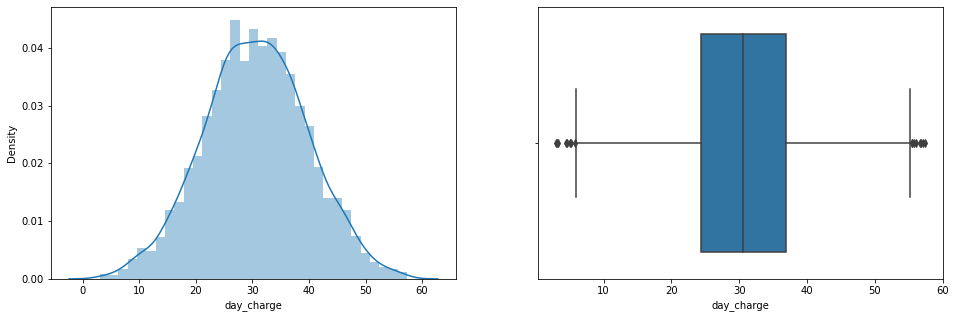

In [91]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["day_charge"])

plt.subplot(1,2,2)
sns.boxplot(df["day_charge"])

plt.show()

In [92]:
# Remove Outliers using z-score
print("Mean value of day_charge",df["day_charge"].mean())
print("std value of day_charge",df["day_charge"].std())
print("Max value of day_charge",df["day_charge"].max())
print("Min value of day_charge",df["day_charge"].min())

Mean value of day_charge 30.587917047880477
std value of day_charge 9.158788706898928
Max value of day_charge 57.36
Min value of day_charge 2.99


In [93]:
# Calculating the Z-Score
df["day_charge z-score"]=(df["day_charge"]-df["day_charge"].mean())/df["day_charge"].std()

In [94]:
# Checking those outliers that are greater than 3
df[df["day_charge z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score


In [95]:
# Checking those outliers that are greater than -3
df[df["day_charge z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score
2252,148,0,0,17.6,161.7,203.1,10.6,1,0,121,...,2.86,28.73,0,1.178622,-2.977828,-0.773475,0.042585,69.192259,1.028817,-3.013272


In [96]:
outlier_Dc=df[(df["day_charge z-score"] > 3) | (df["day_charge z-score"] < -3)]
print(outlier_Dc.shape)
outlier_Dc

(1, 26)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score
2252,148,0,0,17.6,161.7,203.1,10.6,1,0,121,...,2.86,28.73,0,1.178622,-2.977828,-0.773475,0.042585,69.192259,1.028817,-3.013272


In [97]:
df.drop([2252], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,international_charge,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,2.70,75.56,0,0.676388,1.566031,-0.070211,0.864896,84.117430,0.476260,1.581223
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,3.70,59.24,0,0.149043,-0.334128,-0.107640,1.056637,87.597578,1.129282,-0.340429
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,3.29,62.29,0,0.902393,1.167640,-1.571296,-0.757982,54.661744,0.677190,1.178331
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,1.78,66.80,0,-0.428526,2.195746,-2.739463,-0.079971,66.967835,-1.482804,2.217770
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,2.73,52.09,0,-0.654531,-0.240497,-1.037445,-0.277642,63.380053,0.626958,-0.245438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,60,0,0,193.9,85.0,210.1,13.2,3,0,118,...,3.56,53.20,0,-1.031206,0.258868,-2.284409,0.180955,71.703706,0.878120,0.258995
3324,159,0,0,169.8,197.7,193.7,11.6,1,0,114,...,3.13,57.52,0,1.454850,-0.183584,-0.064301,-0.143226,65.819745,0.677190,-0.187570
3325,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,2.51,56.28,0,-0.579196,0.249689,-1.656003,0.837222,83.615141,-0.076296,0.250260
3326,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,4.02,54.40,0,-0.127186,-1.343875,1.651506,-0.435779,60.509828,1.380444,-1.361306


# 11.evening_calls

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


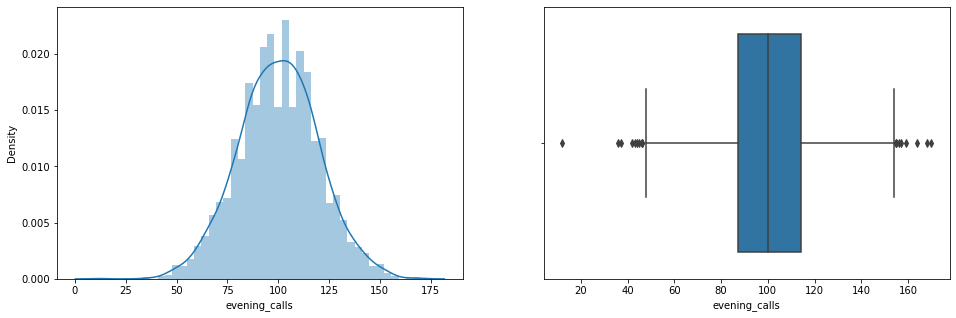

In [98]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["evening_calls"])

plt.subplot(1,2,2)
sns.boxplot(df["evening_calls"])

plt.show()

In [99]:
# Remove Outliers using z-score
print("Mean value of evening_calls",df["evening_calls"].mean())
print("std value of evening_calls",df["evening_calls"].std())
print("Max value of evening_calls",df["evening_calls"].max())
print("Min value of evening_calls",df["evening_calls"].min())

Mean value of evening_calls 100.20225747406955
std value of evening_calls 19.791612746096423
Max value of evening_calls 170
Min value of evening_calls 12


In [100]:
# Calculating the Z-Score
df["evening_calls z-score"]=(df["evening_calls"]-df["evening_calls"].mean())/df["evening_calls"].std()

In [101]:
# Checking those outliers that are greater than 3
df[df["evening_calls z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score
58,68,0,0,148.8,246.5,129.8,12.1,3,0,70,...,55.36,0,-0.830313,-0.569124,0.897023,-1.406343,42.893821,-1.533037,-0.577360,3.223474
301,127,0,0,266.6,264.8,207.2,5.9,1,0,106,...,78.74,1,0.651276,1.593570,1.257520,0.123630,70.663250,0.275331,1.608519,3.425579
3219,150,1,35,139.6,332.8,213.8,8.8,2,0,72,...,64.02,0,1.228845,-0.738027,2.597071,0.254093,73.031185,-1.432572,-0.748780,3.526632


In [102]:
# Checking those outliers that are less than -3
df[df["evening_calls z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score
646,153,1,28,235.6,227.9,170.3,15.4,0,0,74,...,71.24,0,1.304180,1.024440,0.530617,-0.605776,57.424336,-1.332107,1.033115,-3.193386
960,5,0,0,199.2,187.3,214.0,13.3,3,0,106,...,63.00,0,-2.412349,0.356171,-0.269174,0.258046,73.102941,0.275331,0.357262,-4.456547
1615,74,0,0,157.1,213.1,280.4,7.6,2,0,95,...,59.49,0,-0.679643,-0.416744,0.239068,1.570582,96.925810,-0.277226,-0.423409,-3.243912


In [103]:
outlier_Eca=df[(df["evening_calls z-score"] > 3) | (df["evening_calls z-score"] < -3)]
print(outlier_Eca.shape)
outlier_Eca

(6, 27)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score
58,68,0,0,148.8,246.5,129.8,12.1,3,0,70,...,55.36,0,-0.830313,-0.569124,0.897023,-1.406343,42.893821,-1.533037,-0.577360,3.223474
301,127,0,0,266.6,264.8,207.2,5.9,1,0,106,...,78.74,1,0.651276,1.593570,1.257520,0.123630,70.663250,0.275331,1.608519,3.425579
646,153,1,28,235.6,227.9,170.3,15.4,0,0,74,...,71.24,0,1.304180,1.024440,0.530617,-0.605776,57.424336,-1.332107,1.033115,-3.193386
960,5,0,0,199.2,187.3,214.0,13.3,3,0,106,...,63.00,0,-2.412349,0.356171,-0.269174,0.258046,73.102941,0.275331,0.357262,-4.456547
1615,74,0,0,157.1,213.1,280.4,7.6,2,0,95,...,59.49,0,-0.679643,-0.416744,0.239068,1.570582,96.925810,-0.277226,-0.423409,-3.243912
3219,150,1,35,139.6,332.8,213.8,8.8,2,0,72,...,64.02,0,1.228845,-0.738027,2.597071,0.254093,73.031185,-1.432572,-0.748780,3.526632


In [104]:
df.drop([58,301,646,960,1615,3219], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,total_charge,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,75.56,0,0.676388,1.566031,-0.070211,0.864896,84.117430,0.476260,1.581223,-0.060746
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,59.24,0,0.149043,-0.334128,-0.107640,1.056637,87.597578,1.129282,-0.340429,0.141360
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,62.29,0,0.902393,1.167640,-1.571296,-0.757982,54.661744,0.677190,1.178331,0.495045
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,66.80,0,-0.428526,2.195746,-2.739463,-0.079971,66.967835,-1.482804,2.217770,-0.616537
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,52.09,0,-0.654531,-0.240497,-1.037445,-0.277642,63.380053,0.626958,-0.245438,1.101363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,60,0,0,193.9,85.0,210.1,13.2,3,0,118,...,53.20,0,-1.031206,0.258868,-2.284409,0.180955,71.703706,0.878120,0.258995,0.495045
3324,159,0,0,169.8,197.7,193.7,11.6,1,0,114,...,57.52,0,1.454850,-0.183584,-0.064301,-0.143226,65.819745,0.677190,-0.187570,0.242413
3325,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,56.28,0,-0.579196,0.249689,-1.656003,0.837222,83.615141,-0.076296,0.250260,-0.616537
3326,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,54.40,0,-0.127186,-1.343875,1.651506,-0.435779,60.509828,1.380444,-1.361306,-0.667063


# 12.evening_charge

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


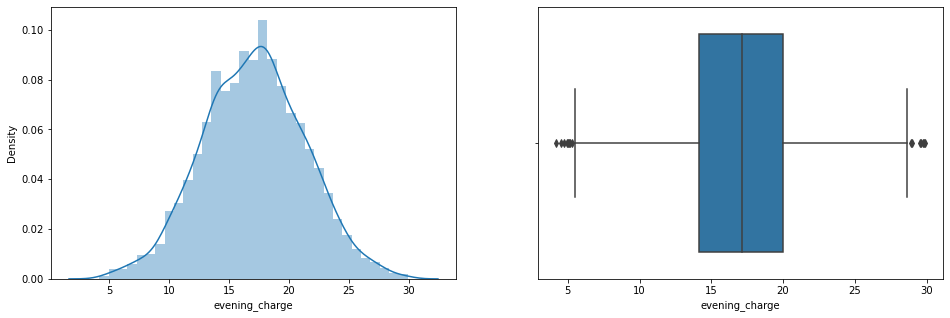

In [105]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["evening_charge"])

plt.subplot(1,2,2)
sns.boxplot(df["evening_charge"])

plt.show()

In [106]:
# Remove Outliers using z-score
print("Mean value of evening_charge",df["evening_charge"].mean())
print("std value of evening_charge",df["evening_charge"].std())
print("Max value of evening_charge",df["evening_charge"].max())
print("Min value of evening_charge",df["evening_charge"].min())

Mean value of evening_charge 17.077176039119795
std value of evening_charge 4.254664385459285
Max value of evening_charge 29.89
Min value of evening_charge 4.18


In [107]:
# Calculating the Z-Score
df["evening_charge z-score"]=(df["evening_charge"]-df["evening_charge"].mean())/df["evening_charge"].std()

In [108]:
# Checking those outliers that are greater than 3
df[df["evening_charge z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score
8,117,0,0,184.5,351.6,215.8,8.7,1,0,97,...,0,0.400159,0.086293,2.967417,0.293627,73.748742,-0.176761,0.085392,-1.020748,3.011477


In [109]:
# Checking those outliers that are less than -3
df[df["evening_charge z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score
1960,38,0,0,149.0,49.2,163.3,13.9,0,0,92,...,0,-1.583663,-0.565452,-2.989644,-0.744145,54.912889,-0.427923,-0.574084,-1.121801,-3.031303


In [110]:
outlier_Ec=df[(df["evening_charge z-score"] > 3) | (df["evening_charge z-score"] < -3)]
print(outlier_Ec.shape)
outlier_Ec

(2, 28)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score
8,117,0,0,184.5,351.6,215.8,8.7,1,0,97,...,0,0.400159,0.086293,2.967417,0.293627,73.748742,-0.176761,0.085392,-1.020748,3.011477
1960,38,0,0,149.0,49.2,163.3,13.9,0,0,92,...,0,-1.583663,-0.565452,-2.989644,-0.744145,54.912889,-0.427923,-0.574084,-1.121801,-3.031303


In [111]:
df.drop([8, 1960], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,churn,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,0,0.676388,1.566031,-0.070211,0.864896,84.117430,0.476260,1.581223,-0.060746,-0.069847
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,0,0.149043,-0.334128,-0.107640,1.056637,87.597578,1.129282,-0.340429,0.141360,-0.107453
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,0,0.902393,1.167640,-1.571296,-0.757982,54.661744,0.677190,1.178331,0.495045,-1.592881
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,0,-0.428526,2.195746,-2.739463,-0.079971,66.967835,-1.482804,2.217770,-0.616537,-2.777464
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,0,-0.654531,-0.240497,-1.037445,-0.277642,63.380053,0.626958,-0.245438,1.101363,-1.049948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,60,0,0,193.9,85.0,210.1,13.2,3,0,118,...,0,-1.031206,0.258868,-2.284409,0.180955,71.703706,0.878120,0.258995,0.495045,-2.314442
3324,159,0,0,169.8,197.7,193.7,11.6,1,0,114,...,0,1.454850,-0.183584,-0.064301,-0.143226,65.819745,0.677190,-0.187570,0.242413,-0.065146
3325,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,0,-0.579196,0.249689,-1.656003,0.837222,83.615141,-0.076296,0.250260,-0.616537,-1.677494
3326,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,0,-0.127186,-1.343875,1.651506,-0.435779,60.509828,1.380444,-1.361306,-0.667063,1.676472


# 13.night_calls

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


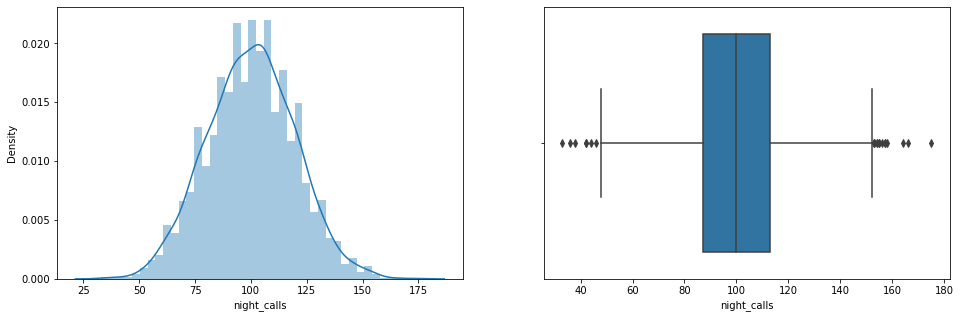

In [112]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["night_calls"])

plt.subplot(1,2,2)
sns.boxplot(df["night_calls"])

plt.show()

In [113]:
# Remove Outliers using z-score
print("Mean value of night_calls",df["night_calls"].mean())
print("std value of night_calls",df["night_calls"].std())
print("Max value of night_calls",df["night_calls"].max())
print("Min value of night_calls",df["night_calls"].min())

Mean value of night_calls 100.12507645259939
std value of night_calls 19.554192008982707
Max value of night_calls 175
Min value of night_calls 33


In [114]:
# Calculating the Z-Score
df["night_calls z-score"]=(df["night_calls"]-df["night_calls"].mean())/df["night_calls"].std()

In [115]:
# Checking those outliers that are greater than 3
df[df["night_calls z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score
493,129,1,33,119.6,278.7,263.4,5.9,2,0,104,...,0.701500,-1.105207,1.531340,1.234541,90.826581,0.174866,-1.120008,-0.616537,1.554253,3.829098
2288,34,0,0,193.7,126.9,221.2,8.8,0,0,74,...,-1.684110,0.255197,-1.459010,0.400369,75.686144,-1.332107,0.255720,-0.818643,-1.477714,3.368839
3211,103,0,0,70.9,134.5,168.8,12.0,2,0,134,...,0.048596,-1.999292,-1.309295,-0.635426,56.886169,1.681838,-2.024058,0.596098,-1.327291,3.266559


In [116]:
# Checking those outliers that are less than -3
df[df["night_calls z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score
2659,15,0,0,121.1,216.0,235.1,16.1,2,0,130,...,-2.161232,-1.077669,0.296195,0.675132,80.673160,1.480909,-1.091620,-0.717590,0.301510,-3.432772
2903,97,1,32,183.4,269.1,203.5,6.7,5,0,94,...,-0.102074,0.066099,1.342227,0.050492,69.335771,-0.327459,0.064646,1.000310,1.361523,-3.177072
2988,105,0,0,259.3,175.2,222.4,12.0,3,0,96,...,0.098819,1.459549,-0.507535,0.424090,76.116678,-0.226994,1.473130,-0.161799,-0.514065,-3.279352


In [117]:
outlier_Nca=df[(df["night_calls z-score"] > 3) | (df["night_calls z-score"] < -3)]
print(outlier_Nca.shape)
outlier_Nca

(6, 29)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score
493,129,1,33,119.6,278.7,263.4,5.9,2,0,104,...,0.701500,-1.105207,1.531340,1.234541,90.826581,0.174866,-1.120008,-0.616537,1.554253,3.829098
2288,34,0,0,193.7,126.9,221.2,8.8,0,0,74,...,-1.684110,0.255197,-1.459010,0.400369,75.686144,-1.332107,0.255720,-0.818643,-1.477714,3.368839
2659,15,0,0,121.1,216.0,235.1,16.1,2,0,130,...,-2.161232,-1.077669,0.296195,0.675132,80.673160,1.480909,-1.091620,-0.717590,0.301510,-3.432772
2903,97,1,32,183.4,269.1,203.5,6.7,5,0,94,...,-0.102074,0.066099,1.342227,0.050492,69.335771,-0.327459,0.064646,1.000310,1.361523,-3.177072
2988,105,0,0,259.3,175.2,222.4,12.0,3,0,96,...,0.098819,1.459549,-0.507535,0.424090,76.116678,-0.226994,1.473130,-0.161799,-0.514065,-3.279352
3211,103,0,0,70.9,134.5,168.8,12.0,2,0,134,...,0.048596,-1.999292,-1.309295,-0.635426,56.886169,1.681838,-2.024058,0.596098,-1.327291,3.266559


In [118]:
df.drop([493, 2288, 2659, 2903, 2988, 3211], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,account_length z-score,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,0.676388,1.566031,-0.070211,0.864896,84.117430,0.476260,1.581223,-0.060746,-0.069847,-0.466656
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,0.149043,-0.334128,-0.107640,1.056637,87.597578,1.129282,-0.340429,0.141360,-0.107453,0.147023
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,0.902393,1.167640,-1.571296,-0.757982,54.661744,0.677190,1.178331,0.495045,-1.592881,0.198163
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,-0.428526,2.195746,-2.739463,-0.079971,66.967835,-1.482804,2.217770,-0.616537,-2.777464,-0.568936
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,-0.654531,-0.240497,-1.037445,-0.277642,63.380053,0.626958,-0.245438,1.101363,-1.049948,1.067542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,60,0,0,193.9,85.0,210.1,13.2,3,0,118,...,-1.031206,0.258868,-2.284409,0.180955,71.703706,0.878120,0.258995,0.495045,-2.314442,1.732361
3324,159,0,0,169.8,197.7,193.7,11.6,1,0,114,...,1.454850,-0.183584,-0.064301,-0.143226,65.819745,0.677190,-0.187570,0.242413,-0.065146,-0.926915
3325,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,-0.579196,0.249689,-1.656003,0.837222,83.615141,-0.076296,0.250260,-0.616537,-1.677494,0.453863
3326,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,-0.127186,-1.343875,1.651506,-0.435779,60.509828,1.380444,-1.361306,-0.667063,1.676472,-0.415516


# 14. night_charge

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


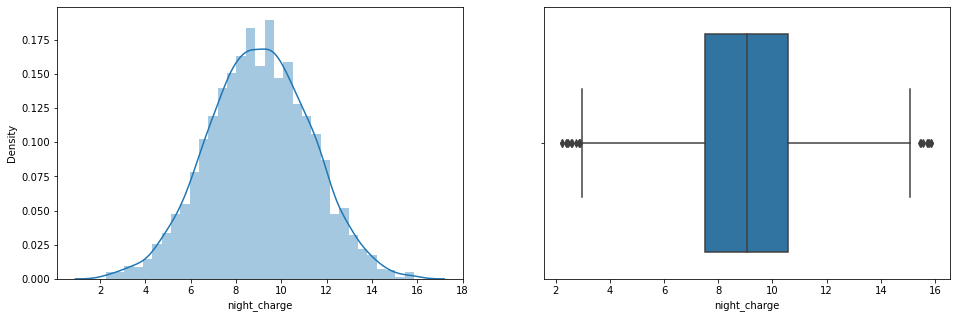

In [119]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["night_charge"])

plt.subplot(1,2,2)
sns.boxplot(df["night_charge"])

plt.show()

In [120]:
# Remove Outliers using z-score
print("Mean value of night_charge",df["night_charge"].mean())
print("std value of night_charge",df["night_charge"].std())
print("Max value of night_charge",df["night_charge"].max())
print("Min value of night_charge",df["night_charge"].min())

Mean value of night_charge 9.033890931372566
std value of night_charge 2.241353159510714
Max value of night_charge 15.86
Min value of night_charge 2.25


In [121]:
# Calculating the Z-Score
df["night_charge z-score"]=(df["night_charge"]-df["night_charge"].mean())/df["night_charge"].std()

In [122]:
# Checking those outliers that are greater than 3
df[df["night_charge z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score
1238,147,1,24,219.9,208.5,352.5,8.1,3,1,118,...,0.736203,0.148451,2.995789,122.793714,0.878120,0.741592,0.798204,0.151087,0.556143,3.045530
2754,96,1,23,183.1,147.4,350.2,11.3,1,0,88,...,0.060591,-1.055175,2.950325,121.968524,-0.628853,0.059187,-0.566010,-1.068751,0.402723,3.000914
3060,94,0,0,212.1,189.4,352.2,8.4,3,0,98,...,0.593003,-0.227805,2.989859,122.686081,-0.126529,0.597468,-0.566010,-0.229672,-0.262096,3.041069


In [123]:
# Checking those outliers that are less than -3
df[df["night_charge z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score
1072,164,1,25,219.1,151.5,50.1,14.3,1,0,88,...,0.721516,-0.974408,-2.981781,14.299203,-0.628853,0.727398,-0.060746,-0.986488,-2.051994,-3.026694
2756,123,0,0,140.0,153.7,50.1,12.5,2,0,106,...,-0.730683,-0.931069,-2.981781,14.299203,0.275331,-0.741137,0.040307,-0.944182,-0.671215,-3.026694


In [124]:
outlier_Nc=df[(df["night_charge z-score"] > 3) | (df["night_charge z-score"] < -3)]
print(outlier_Nc.shape)
outlier_Nc

(5, 30)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score
1072,164,1,25,219.1,151.5,50.1,14.3,1,0,88,...,0.721516,-0.974408,-2.981781,14.299203,-0.628853,0.727398,-0.060746,-0.986488,-2.051994,-3.026694
1238,147,1,24,219.9,208.5,352.5,8.1,3,1,118,...,0.736203,0.148451,2.995789,122.793714,0.878120,0.741592,0.798204,0.151087,0.556143,3.045530
2754,96,1,23,183.1,147.4,350.2,11.3,1,0,88,...,0.060591,-1.055175,2.950325,121.968524,-0.628853,0.059187,-0.566010,-1.068751,0.402723,3.000914
2756,123,0,0,140.0,153.7,50.1,12.5,2,0,106,...,-0.730683,-0.931069,-2.981781,14.299203,0.275331,-0.741137,0.040307,-0.944182,-0.671215,-3.026694
3060,94,0,0,212.1,189.4,352.2,8.4,3,0,98,...,0.593003,-0.227805,2.989859,122.686081,-0.126529,0.597468,-0.566010,-0.229672,-0.262096,3.041069


In [125]:
df.drop([1072, 1238, 2754, 2756, 3060], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,1.566031,-0.070211,0.864896,84.117430,0.476260,1.581223,-0.060746,-0.069847,-0.466656,0.881659
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,-0.334128,-0.107640,1.056637,87.597578,1.129282,-0.340429,0.141360,-0.107453,0.147023,1.077969
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,1.167640,-1.571296,-0.757982,54.661744,0.677190,1.178331,0.495045,-1.592881,0.198163,-0.764668
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,2.195746,-2.739463,-0.079971,66.967835,-1.482804,2.217770,-0.616537,-2.777464,-0.568936,-0.077583
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,-0.240497,-1.037445,-0.277642,63.380053,0.626958,-0.245438,1.101363,-1.049948,1.067542,-0.278355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,60,0,0,193.9,85.0,210.1,13.2,3,0,118,...,0.258868,-2.284409,0.180955,71.703706,0.878120,0.258995,0.495045,-2.314442,1.732361,0.185651
3324,159,0,0,169.8,197.7,193.7,11.6,1,0,114,...,-0.183584,-0.064301,-0.143226,65.819745,0.677190,-0.187570,0.242413,-0.065146,-0.926915,-0.140045
3325,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,0.249689,-1.656003,0.837222,83.615141,-0.076296,0.250260,-0.616537,-1.677494,0.453863,0.854889
3326,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,-1.343875,1.651506,-0.435779,60.509828,1.380444,-1.361306,-0.667063,1.676472,-0.415516,-0.438972


# 15.international_calls

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


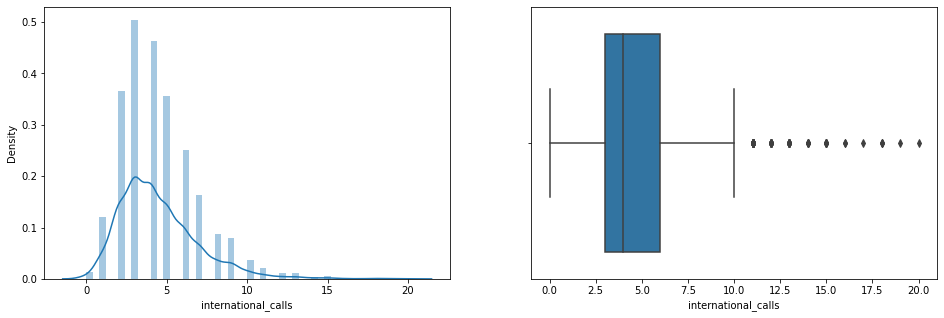

In [126]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["international_calls"])

plt.subplot(1,2,2)
sns.boxplot(df["international_calls"])

plt.show()

In [127]:
# Finding IQR
Percentile25=df["international_calls"].quantile(0.25)
print("Percentile 25 :",Percentile25)
Percentile75=df["international_calls"].quantile(0.75)
print("Percentile 75 :",Percentile75)

Percentile 25 : 3.0
Percentile 75 : 6.0


In [128]:
iqr=Percentile75-Percentile25
print("IQR :",iqr)

IQR : 3.0


In [129]:
upper_limit=Percentile75+1.5*iqr
print("Upper Limit",upper_limit)
lower_limit=Percentile25-1.5*iqr
print("Lower Limit",lower_limit)

Upper Limit 10.5
Lower Limit -1.5


In [130]:
Ul=df[df["international_calls"]>upper_limit]
Ul.shape

(76, 30)

In [131]:
Ll=df[df["international_calls"]<lower_limit]
Ll.shape

(0, 30)

In [132]:
outlier_Ica=df[(df["international_calls"]>upper_limit ) | (df["international_calls"]<lower_limit)]
print(outlier_Ica.shape)
outlier_Ica

(76, 30)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,day_mins z-score,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score
22,130,0,0,183.0,72.9,181.8,9.5,0,0,112,...,0.058755,-2.522771,-0.378454,61.550285,0.576725,0.057003,-0.060746,-2.556530,-1.131475,-0.380971
41,135,1,41,173.1,203.9,122.2,14.6,0,1,85,...,-0.122999,0.057834,-1.556573,40.167107,-0.779550,-0.126427,0.343466,0.059423,-1.131475,-1.576677
153,56,0,0,226.0,248.5,140.5,6.9,1,0,112,...,0.848193,0.936422,-1.194835,46.732747,0.576725,0.855144,0.899257,0.950210,2.141481,-1.210827
182,67,1,36,115.6,237.7,169.9,9.9,2,0,111,...,-1.178643,0.723670,-0.613683,57.280825,0.526493,-1.194254,-0.313378,0.733977,0.147023,-0.617435
185,73,0,0,214.3,268.5,241.2,10.8,1,0,145,...,0.633392,1.330407,0.795711,82.861707,2.234395,0.637866,1.758207,1.349771,-0.415516,0.810273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,16,0,0,161.9,230.1,148.8,10.2,3,0,100,...,-0.328620,0.573955,-1.030768,49.710606,-0.026064,-0.334970,1.909786,0.583553,-1.131475,-1.041287
3206,143,0,0,133.4,223.9,180.4,10.2,1,0,107,...,-0.851853,0.451820,-0.406128,61.047995,0.325563,-0.863424,0.848730,0.458984,-0.773495,-0.407741
3230,87,0,0,186.9,182.6,143.1,4.2,1,0,79,...,0.130355,-0.361760,-1.143441,47.665571,-1.080945,0.129065,0.242413,-0.365993,-0.517796,-1.157288
3291,119,1,22,172.1,223.6,150.0,13.9,1,1,119,...,-0.141358,0.445910,-1.007048,50.141140,0.928352,-0.144988,1.657154,0.454284,-0.313236,-1.018979


# 16.international_charge

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


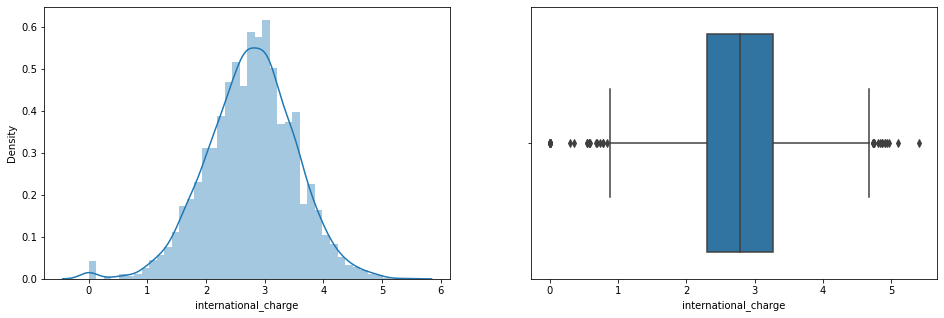

In [133]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["international_charge"])

plt.subplot(1,2,2)
sns.boxplot(df["international_charge"])

plt.show()

In [134]:
# Remove Outliers using z-score
print("Mean value of international_charge",df["international_charge"].mean())
print("std value of international_charge",df["international_charge"].std())
print("Max value of international_charge",df["international_charge"].max())
print("Min value of international_charge",df["international_charge"].min())

Mean value of international_charge 2.7652255293034576
std value of international_charge 0.7513373199403593
Max value of international_charge 5.4
Min value of international_charge 0.0


In [135]:
# Calculating the Z-Score
df["international_charge z-score"]=(df["international_charge"]-df["international_charge"].mean())/df["international_charge"].std()

In [136]:
# Checking those outliers that are greater than 3
df[df["international_charge z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score
115,36,1,42,196.8,254.9,138.3,20.0,0,1,89,...,1.062497,-1.238323,45.943436,-0.578621,0.313588,1.101363,1.079480,1.323242,-1.255443,3.506780
314,128,0,0,125.2,205.4,254.4,18.9,0,0,99,...,0.087383,1.056637,87.597578,-0.076296,-1.016283,0.343466,0.089977,0.556143,1.077969,3.107492


In [137]:
# Checking those outliers that are less than -3
df[df["international_charge z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score
179,70,0,0,232.1,292.3,201.2,0.0,3,0,122,...,1.799250,0.005028,68.510581,1.079049,0.968696,0.596098,1.826895,0.607283,0.007187,-3.680405
343,98,1,21,64.6,176.1,244.8,0.0,2,0,98,...,-0.489806,0.866873,84.153308,-0.126529,-2.140885,-0.717590,-0.495263,-0.824635,0.886121,-3.680405
488,165,0,0,242.9,209.8,228.4,0.0,1,0,126,...,0.174060,0.542693,78.269346,1.279979,1.168504,-1.778645,0.176941,1.323242,0.555963,-3.680405
595,87,1,28,151.4,152.4,250.1,0.0,1,0,95,...,-0.956678,0.971639,86.054832,-0.277226,-0.529319,-0.161799,-0.970036,0.453863,0.988737,-3.680405
712,106,0,0,114.4,78.3,232.7,0.0,2,0,104,...,-2.416395,0.627691,79.812092,0.174866,-1.216091,0.040307,-2.448413,-1.131475,0.640733,-3.680405
762,161,0,0,189.6,267.4,184.5,1.3,1,1,78,...,1.308738,-0.325083,62.518986,-1.131177,0.179290,0.848730,1.328618,1.885781,-0.327432,-3.214569
878,62,0,0,281.0,160.6,77.9,0.0,1,0,66,...,-0.795144,-2.432256,24.273236,-1.733966,1.876021,0.393992,-0.805510,-1.336035,-2.464534,-3.680405
1028,70,0,0,222.8,215.9,223.5,0.0,1,0,114,...,0.294226,0.445834,76.511333,0.677190,0.796184,0.646625,0.299160,1.118682,0.457808,-3.680405
1080,114,0,0,191.5,175.2,220.3,0.0,0,0,88,...,-0.507535,0.382579,75.363243,-0.628853,0.215321,-1.121801,-0.514065,0.914122,0.390884,-3.680405
1400,115,0,0,132.0,197.5,175.8,0.0,3,0,90,...,-0.068241,-0.497057,59.397616,-0.528388,-0.889628,-1.273381,-0.067497,0.709563,-0.501434,-3.680405


In [138]:
outlier_Ic=df[(df["international_charge z-score"] > 3) | (df["international_charge z-score"] < -3)]
print(outlier_Ic.shape)
outlier_Ic

(22, 31)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_mins z-score,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score
115,36,1,42,196.8,254.9,138.3,20.0,0,1,89,...,1.062497,-1.238323,45.943436,-0.578621,0.313588,1.101363,1.079480,1.323242,-1.255443,3.506780
179,70,0,0,232.1,292.3,201.2,0.0,3,0,122,...,1.799250,0.005028,68.510581,1.079049,0.968696,0.596098,1.826895,0.607283,0.007187,-3.680405
314,128,0,0,125.2,205.4,254.4,18.9,0,0,99,...,0.087383,1.056637,87.597578,-0.076296,-1.016283,0.343466,0.089977,0.556143,1.077969,3.107492
343,98,1,21,64.6,176.1,244.8,0.0,2,0,98,...,-0.489806,0.866873,84.153308,-0.126529,-2.140885,-0.717590,-0.495263,-0.824635,0.886121,-3.680405
488,165,0,0,242.9,209.8,228.4,0.0,1,0,126,...,0.174060,0.542693,78.269346,1.279979,1.168504,-1.778645,0.176941,1.323242,0.555963,-3.680405
595,87,1,28,151.4,152.4,250.1,0.0,1,0,95,...,-0.956678,0.971639,86.054832,-0.277226,-0.529319,-0.161799,-0.970036,0.453863,0.988737,-3.680405
712,106,0,0,114.4,78.3,232.7,0.0,2,0,104,...,-2.416395,0.627691,79.812092,0.174866,-1.216091,0.040307,-2.448413,-1.131475,0.640733,-3.680405
762,161,0,0,189.6,267.4,184.5,1.3,1,1,78,...,1.308738,-0.325083,62.518986,-1.131177,0.179290,0.848730,1.328618,1.885781,-0.327432,-3.214569
878,62,0,0,281.0,160.6,77.9,0.0,1,0,66,...,-0.795144,-2.432256,24.273236,-1.733966,1.876021,0.393992,-0.805510,-1.336035,-2.464534,-3.680405
1028,70,0,0,222.8,215.9,223.5,0.0,1,0,114,...,0.294226,0.445834,76.511333,0.677190,0.796184,0.646625,0.299160,1.118682,0.457808,-3.680405


# 17.total_charge

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


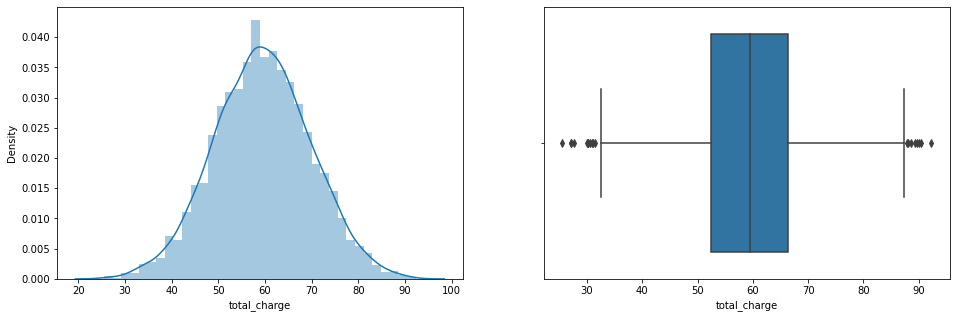

In [139]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["total_charge"])

plt.subplot(1,2,2)
sns.boxplot(df["total_charge"])

plt.show()

In [140]:
print("Mean value of total_charge",df["total_charge"].mean())
print("std value of total_charge",df["total_charge"].std())
print("Max value of total_charge",df["total_charge"].max())
print("Min value of total_charge",df["total_charge"].min())

Mean value of total_charge 59.47560294568881
std value of total_charge 10.332906164909932
Max value of total_charge 92.29
Min value of total_charge 25.52


In [141]:
# Calculating the Z-Score
df["total_charge z-score"]=(df["total_charge"]-df["total_charge"].mean())/df["total_charge"].std()

In [142]:
# Checking those outliers that are greater than 3
df[df["total_charge z-score"] > 3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score,total_charge z-score
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,...,-0.797517,53.944188,-1.683734,2.839031,-0.161799,2.334573,1.425522,-0.804822,-1.737203,3.175718


In [143]:
# Checking those outliers that are less than -3
df[df["total_charge z-score"] < -3]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score,total_charge z-score
77,144,0,0,61.6,77.1,173.0,8.2,4,0,117,...,-0.552405,58.393037,0.827887,-2.196570,-0.768116,-2.474267,-0.057536,-0.554973,-0.738983,-3.140995
648,131,1,39,69.1,101.3,104.8,9.1,0,0,122,...,-1.900521,33.924368,1.079049,-2.056813,1.808733,-1.990093,-0.313236,-1.924681,-0.406243,-3.090670
1621,138,1,21,19.5,140.9,179.7,7.9,0,0,149,...,-0.419965,60.796851,2.435325,-2.977241,0.444519,-1.198021,0.556143,-0.421125,-0.845460,-3.286162
2859,87,0,0,58.0,67.5,185.9,11.5,0,0,125,...,-0.297409,63.021275,1.229747,-2.263172,0.798204,-2.664646,1.834641,-0.296201,0.458881,-3.135188


In [144]:
outlier_Tc=df[(df["total_charge z-score"] > 3) | (df["total_charge z-score"] < -3)]
print(outlier_Tc.shape)
outlier_Tc

(5, 32)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score,total_charge z-score
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,...,-0.797517,53.944188,-1.683734,2.839031,-0.161799,2.334573,1.425522,-0.804822,-1.737203,3.175718
77,144,0,0,61.6,77.1,173.0,8.2,4,0,117,...,-0.552405,58.393037,0.827887,-2.196570,-0.768116,-2.474267,-0.057536,-0.554973,-0.738983,-3.140995
648,131,1,39,69.1,101.3,104.8,9.1,0,0,122,...,-1.900521,33.924368,1.079049,-2.056813,1.808733,-1.990093,-0.313236,-1.924681,-0.406243,-3.090670
1621,138,1,21,19.5,140.9,179.7,7.9,0,0,149,...,-0.419965,60.796851,2.435325,-2.977241,0.444519,-1.198021,0.556143,-0.421125,-0.845460,-3.286162
2859,87,0,0,58.0,67.5,185.9,11.5,0,0,125,...,-0.297409,63.021275,1.229747,-2.263172,0.798204,-2.664646,1.834641,-0.296201,0.458881,-3.135188


In [145]:
df.drop([15, 77, 648, 1621, 2859], axis=0, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score,total_charge z-score
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,0.864896,84.117430,0.476260,1.581223,-0.060746,-0.069847,-0.466656,0.881659,-0.086813,1.556619
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,1.056637,87.597578,1.129282,-0.340429,0.141360,-0.107453,0.147023,1.077969,1.244148,-0.022801
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,-0.757982,54.661744,0.677190,1.178331,0.495045,-1.592881,0.198163,-0.764668,0.698454,0.272372
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,-0.079971,66.967835,-1.482804,2.217770,-0.616537,-2.777464,-0.568936,-0.077583,-1.311296,0.708842
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,-0.277642,63.380053,0.626958,-0.245438,1.101363,-1.049948,1.067542,-0.278355,-0.046884,-0.714765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,60,0,0,193.9,85.0,210.1,13.2,3,0,118,...,0.180955,71.703706,0.878120,0.258995,0.495045,-2.314442,1.732361,0.185651,1.057813,-0.607342
3324,159,0,0,169.8,197.7,193.7,11.6,1,0,114,...,-0.143226,65.819745,0.677190,-0.187570,0.242413,-0.065146,-0.926915,-0.140045,0.485500,-0.189260
3325,78,0,0,193.4,116.9,243.3,9.3,2,0,99,...,0.837222,83.615141,-0.076296,0.250260,-0.616537,-1.677494,0.453863,0.854889,-0.339695,-0.309265
3326,96,0,0,106.6,284.8,178.9,14.9,1,0,128,...,-0.435779,60.509828,1.380444,-1.361306,-0.667063,1.676472,-0.415516,-0.438972,1.670055,-0.491208


# 18. churn

C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


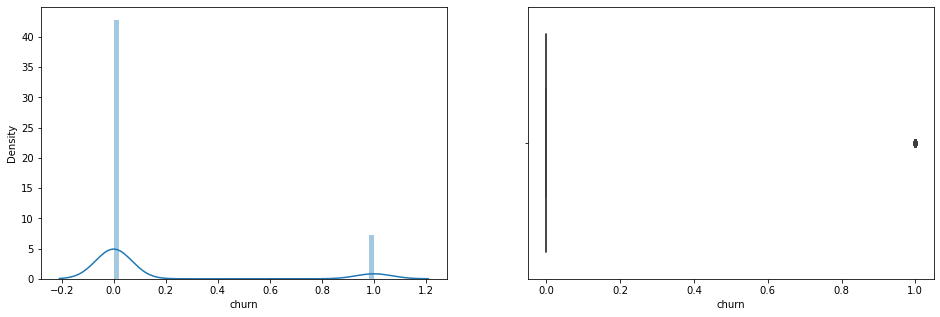

In [146]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["churn"])

plt.subplot(1,2,2)
sns.boxplot(df["churn"])

plt.show()

In [147]:
# Finding IQR
Percentile25=df["churn"].quantile(0.25)
print("Percentile 25 :",Percentile25)
Percentile75=df["churn"].quantile(0.75)
print("Percentile 75 :",Percentile75)

Percentile 25 : 0.0
Percentile 75 : 0.0


In [148]:
iqr=Percentile75-Percentile25
print("IQR :",iqr)

IQR : 0.0


In [149]:
upper_limit=Percentile75+1.5*iqr
print("Upper Limit",upper_limit)
lower_limit=Percentile25-1.5*iqr
print("Lower Limit",lower_limit)

Upper Limit 0.0
Lower Limit 0.0


In [150]:
Ul=df[df["churn"]>upper_limit]
Ul.shape

(467, 32)

In [151]:
Ll=df[df["churn"]<lower_limit]
Ll.shape

(0, 32)

In [152]:
outlier_churn=df[(df["churn"]>upper_limit ) | (df["churn"]<lower_limit)]
print(outlier_churn.shape)
outlier_churn

(467, 32)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,night_mins z-score,international_mins z-score,day_calls z-score,day_charge z-score,evening_calls z-score,evening_charge z-score,night_calls z-score,night_charge z-score,international_charge z-score,total_charge z-score
10,65,0,0,129.1,228.5,208.8,12.7,4,0,137,...,0.155257,71.237295,1.832536,-0.943129,-0.869169,0.550648,0.556143,0.163343,0.884788,-0.510563
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,...,0.171071,71.524317,-0.578621,-2.181284,1.050836,-0.619832,-1.847434,0.176728,-1.630726,-2.269991
33,12,0,0,249.6,252.4,280.2,11.8,1,0,118,...,1.566628,96.854054,0.878120,1.292975,0.949783,1.027772,-0.517796,1.595513,0.565358,1.955345
41,135,1,41,173.1,203.9,122.2,14.6,0,1,85,...,-1.556573,40.167107,-0.779550,-0.126427,0.343466,0.059423,-1.131475,-1.576677,1.563578,-0.317007
48,119,0,0,159.1,231.3,143.2,8.8,5,0,114,...,-1.141464,47.701448,0.677190,-0.386287,0.848730,0.607057,-0.466656,-1.157288,-0.512720,-0.381848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,76,0,0,107.3,238.2,271.8,10.0,4,0,140,...,1.400585,93.840318,1.983233,-1.348204,1.657154,0.745728,0.811842,1.425973,-0.086813,-0.586050
3287,170,1,42,199.5,135.0,184.6,10.9,4,0,119,...,-0.323106,62.554864,0.928352,0.363813,-0.515484,-1.315539,-2.614533,-0.322970,0.232618,-0.273457
3291,119,1,22,172.1,223.6,150.0,13.9,1,1,119,...,-1.007048,50.141140,0.928352,-0.144988,1.657154,0.454284,-0.313236,-1.018979,1.310696,-0.068287
3301,84,0,0,280.0,202.2,156.8,10.4,0,0,113,...,-0.872632,52.580831,0.626958,1.857460,-0.515484,0.026518,0.147023,-0.880669,0.059593,1.469519


In [153]:
df.shape

(3254, 32)

# Plots

In [154]:
#removal of un necessary columns (Outliers)
df.drop(['account_length z-score','day_mins z-score','evening_mins z-score','night_mins z-score','international_mins z-score','day_calls z-score','day_charge z-score','evening_calls z-score','evening_charge z-score','night_calls z-score','night_charge z-score','international_charge z-score','total_charge z-score'],axis=1, inplace=True)

<AxesSubplot:>

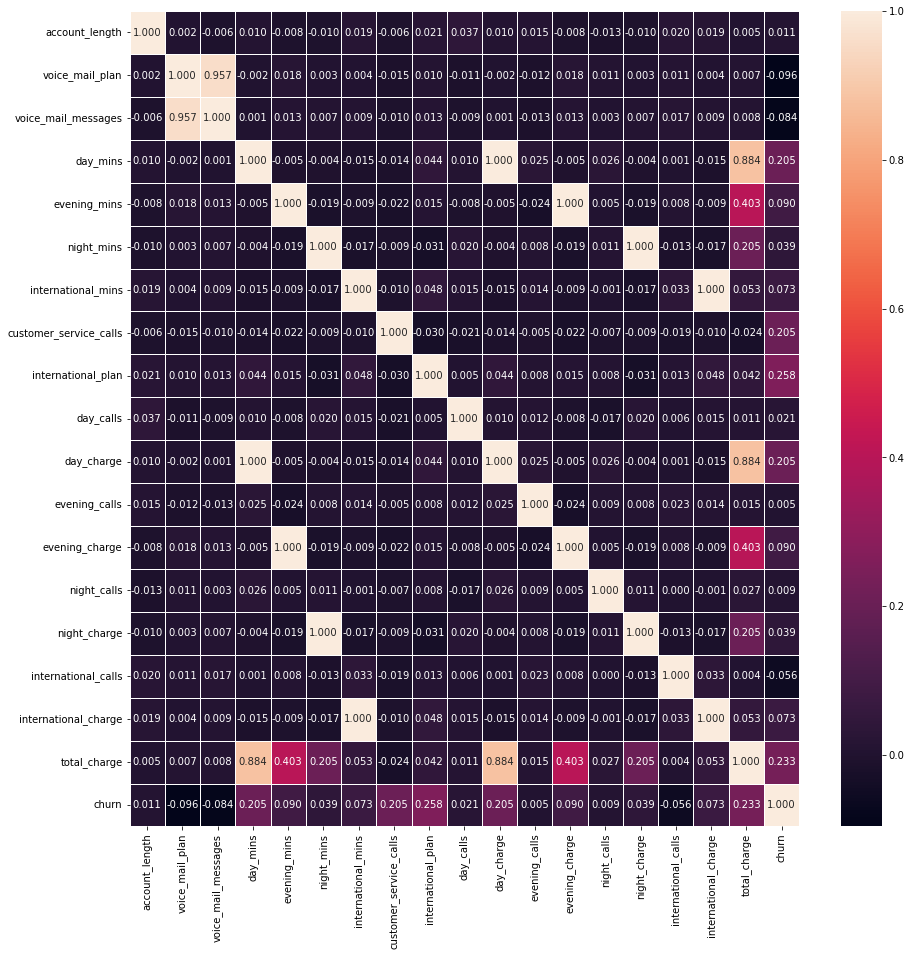

In [155]:
# creating a heatmap of correlation of the data.
corr = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

* Accunt length
* Total Charge

# Saving new dataset

In [156]:
# df.to_csv(r'D:/p-133/churn_1.csv', index=False)
df.to_csv(r'export_churn.csv',index=False)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,60,0,0,193.9,85.0,210.1,13.2,3,0,118,32.96,110,7.23,134,9.45,8,3.56,53.20,0
3324,159,0,0,169.8,197.7,193.7,11.6,1,0,114,28.87,105,16.80,82,8.72,4,3.13,57.52,0
3325,78,0,0,193.4,116.9,243.3,9.3,2,0,99,32.88,88,9.94,109,10.95,4,2.51,56.28,0
3326,96,0,0,106.6,284.8,178.9,14.9,1,0,128,18.12,87,24.21,92,8.05,7,4.02,54.40,0


In [157]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [158]:
# Dividing our data into input and output variables 
X = df.iloc[:,0:18]
Y = df.iloc[:,18]

# Cross Validation

In [159]:
# Stratified K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
X=df.iloc[:,0:18]
Y=df.iloc[:,18]
logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=500)
score=cross_val_score(logreg,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 467 members, which is less than n_splits=500.
  warnings.warn(
C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit

Cross Validation Scores are [0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.71428571 0.85714286 0.85714286 0.71428571 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 1.         0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 1.         0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 1.         0.85714286 0.85714286 0.85714286 1.
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 1.         0.85714286 0.85714286 0.857142

C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [160]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

X = df.iloc[:,0:18]
Y = df.iloc[:,18]
logreg=LogisticRegression()
kf=KFold(n_splits=300)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Cross Validation Scores are [0.90909091 0.90909091 0.90909091 0.90909091 0.72727273 0.90909091
 0.90909091 0.63636364 0.81818182 1.         0.81818182 0.72727273
 0.90909091 0.81818182 1.         1.         0.81818182 0.81818182
 1.         0.81818182 0.81818182 0.90909091 0.81818182 1.
 0.90909091 0.90909091 0.81818182 0.81818182 0.90909091 0.81818182
 0.90909091 0.81818182 0.90909091 0.72727273 1.         0.72727273
 0.90909091 0.90909091 0.81818182 1.         0.81818182 0.81818182
 0.90909091 0.81818182 0.90909091 0.72727273 0.81818182 1.
 0.72727273 0.90909091 0.90909091 0.81818182 0.81818182 0.81818182
 0.90909091 0.72727273 0.90909091 1.         0.81818182 1.
 0.90909091 1.         1.         0.90909091 0.90909091 0.81818182
 1.         1.         0.72727273 0.72727273 0.81818182 0.90909091
 0.90909091 0.90909091 0.81818182 0.90909091 0.90909091 0.90909091
 1.         0.81818182 0.45454545 0.90909091 0.90909091 0.81818182
 0.81818182 0.81818182 0.72727273 0.90909091 0.90909091 1.

C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [161]:
# Leave One Out cross-validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut,cross_val_score
X=df.iloc[:,0:18]
Y=df.iloc[:,18]
loo=LeaveOneOut()
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. ... 1. 1. 1.]
Average Cross Validation score :0.9403810694529809


In [162]:
# Monte Carlo Cross-Validation(Shuffle Split)
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)
scores=cross_val_score(logreg,df.iloc[:,0:18],df.iloc[:,18],cv=shuffle_split)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

cross Validation scores:n [0.84237462 0.85363357 0.8618219  0.83316274 0.8444217  0.86591607
 0.87308086 0.85977482 0.84135107 0.85056295]
Average Cross Validation score :0.8526100307062435


C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Harshada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

# Feature Engineering

In [163]:
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import chi2


bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Scores']
featureScores

,Specs,Scores
0,account_length,5.556546
1,voice_mail_plan,21.745962
2,voice_mail_messages,527.572020
3,day_mins,2172.359368
4,evening_mins,325.093551
5,night_mins,60.029325
6,international_mins,13.246152
7,customer_service_calls,150.661341
8,international_plan,195.817587
9,day_calls,5.423169


In [164]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)


[5.557e+00 2.175e+01 5.276e+02 2.172e+03 3.251e+02 6.003e+01 1.325e+01
 1.507e+02 1.958e+02 5.423e+00 3.693e+02 3.322e-01 2.763e+01 8.938e-01
 2.701e+00 1.362e+01 3.578e+00 3.115e+02]


In [165]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit (X,Y)
print (model. feature_importances_)
ExtraTreesClassifier()

[0.03  0.028 0.023 0.09  0.045 0.032 0.045 0.127 0.073 0.032 0.094 0.029
 0.044 0.031 0.032 0.051 0.042 0.153]


ExtraTreesClassifier()

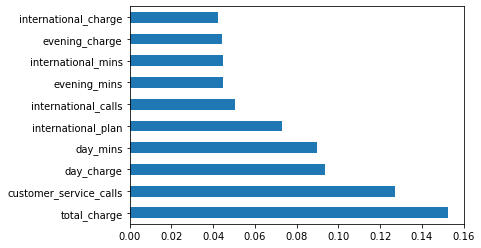

In [166]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

# For Imbalanced Data (Smote)

In [167]:
# pip install imblearn

In [168]:
# Over Sampling minority class using Synthetic Minority Oversampling Technique (SMOTE)
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
smot = SMOTE(sampling_strategy='minority')
X_smot, Y_smot = smot.fit_resample(X,Y)

In [169]:
X_smot

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,128,1,25,265.100000,197.400000,244.700000,10.000000,1,0,110,45.070000,99,16.780000,91,11.010000,3,2.700000,75.560000
1,107,1,26,161.600000,195.500000,254.400000,13.700000,1,0,123,27.470000,103,16.620000,103,11.450000,3,3.700000,59.240000
2,137,0,0,243.400000,121.200000,162.600000,12.200000,0,0,114,41.380000,110,10.300000,104,7.320000,5,3.290000,62.290000
3,84,0,0,299.400000,61.900000,196.900000,6.600000,2,1,71,50.900000,88,5.260000,89,8.860000,7,1.780000,66.800000
4,75,0,0,166.700000,148.300000,186.900000,10.100000,3,1,113,28.340000,122,12.610000,121,8.410000,3,2.730000,52.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,49,0,0,175.345225,213.861446,268.453244,13.523968,0,0,140,29.808887,89,18.181843,97,12.080797,5,3.654794,63.726320
5570,124,0,0,236.756465,265.291154,221.075281,11.343864,1,0,131,40.244926,89,22.550048,74,9.951587,5,3.063879,75.810441
5571,105,0,0,107.075728,239.039875,149.205216,5.571101,5,0,71,18.204914,83,20.319768,112,6.717573,3,1.503238,46.745493
5572,125,0,18,212.659749,193.214895,210.046433,12.695404,0,0,91,36.154026,73,16.427179,110,9.453851,4,3.428193,65.463249


In [170]:
Y_smot

0       0
1       0
2       0
3       0
4       0
       ..
5569    1
5570    1
5571    1
5572    1
5573    1
Name: churn, Length: 5574, dtype: int64

In [171]:
df1= pd.concat([X_smot, Y_smot], axis=1)
df1

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.100000,197.400000,244.700000,10.000000,1,0,110,45.070000,99,16.780000,91,11.010000,3,2.700000,75.560000,0
1,107,1,26,161.600000,195.500000,254.400000,13.700000,1,0,123,27.470000,103,16.620000,103,11.450000,3,3.700000,59.240000,0
2,137,0,0,243.400000,121.200000,162.600000,12.200000,0,0,114,41.380000,110,10.300000,104,7.320000,5,3.290000,62.290000,0
3,84,0,0,299.400000,61.900000,196.900000,6.600000,2,1,71,50.900000,88,5.260000,89,8.860000,7,1.780000,66.800000,0
4,75,0,0,166.700000,148.300000,186.900000,10.100000,3,1,113,28.340000,122,12.610000,121,8.410000,3,2.730000,52.090000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,49,0,0,175.345225,213.861446,268.453244,13.523968,0,0,140,29.808887,89,18.181843,97,12.080797,5,3.654794,63.726320,1
5570,124,0,0,236.756465,265.291154,221.075281,11.343864,1,0,131,40.244926,89,22.550048,74,9.951587,5,3.063879,75.810441,1
5571,105,0,0,107.075728,239.039875,149.205216,5.571101,5,0,71,18.204914,83,20.319768,112,6.717573,3,1.503238,46.745493,1
5572,125,0,18,212.659749,193.214895,210.046433,12.695404,0,0,91,36.154026,73,16.427179,110,9.453851,4,3.428193,65.463249,1


In [172]:
# Standardization

from sklearn.preprocessing import scale
df2=scale(df1)

In [173]:
df2

array([[ 0.72 ,  2.071,  1.496, ..., -0.17 ,  1.132, -1.   ],
       [ 0.164,  2.071,  1.577, ...,  1.264, -0.24 , -1.   ],
       [ 0.958, -0.483, -0.529, ...,  0.676,  0.016, -1.   ],
       ...,
       [ 0.111, -0.483, -0.529, ..., -1.885, -1.291,  1.   ],
       [ 0.64 , -0.483,  0.929, ...,  0.874,  0.283,  1.   ],
       [ 0.72 ,  2.071,  0.929, ...,  1.217,  0.238,  1.   ]])

In [174]:
df = pd.DataFrame(df1, columns =['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge'])
df.drop(["voice_mail_plan","voice_mail_messages","night_mins","international_mins"], axis = 1, inplace = True)
df

,account_length,day_mins,evening_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,128,265.100000,197.400000,1,0,110,45.070000,99,16.780000,91,11.010000,3,2.700000,75.560000
1,107,161.600000,195.500000,1,0,123,27.470000,103,16.620000,103,11.450000,3,3.700000,59.240000
2,137,243.400000,121.200000,0,0,114,41.380000,110,10.300000,104,7.320000,5,3.290000,62.290000
3,84,299.400000,61.900000,2,1,71,50.900000,88,5.260000,89,8.860000,7,1.780000,66.800000
4,75,166.700000,148.300000,3,1,113,28.340000,122,12.610000,121,8.410000,3,2.730000,52.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,49,175.345225,213.861446,0,0,140,29.808887,89,18.181843,97,12.080797,5,3.654794,63.726320
5570,124,236.756465,265.291154,1,0,131,40.244926,89,22.550048,74,9.951587,5,3.063879,75.810441
5571,105,107.075728,239.039875,5,0,71,18.204914,83,20.319768,112,6.717573,3,1.503238,46.745493
5572,125,212.659749,193.214895,0,0,91,36.154026,73,16.427179,110,9.453851,4,3.428193,65.463249


In [175]:
df.to_csv('standardize.csv', index=False)

In [176]:
final = pd.concat([df, Y_smot], axis=1)
final

,account_length,day_mins,evening_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,265.100000,197.400000,1,0,110,45.070000,99,16.780000,91,11.010000,3,2.700000,75.560000,0
1,107,161.600000,195.500000,1,0,123,27.470000,103,16.620000,103,11.450000,3,3.700000,59.240000,0
2,137,243.400000,121.200000,0,0,114,41.380000,110,10.300000,104,7.320000,5,3.290000,62.290000,0
3,84,299.400000,61.900000,2,1,71,50.900000,88,5.260000,89,8.860000,7,1.780000,66.800000,0
4,75,166.700000,148.300000,3,1,113,28.340000,122,12.610000,121,8.410000,3,2.730000,52.090000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,49,175.345225,213.861446,0,0,140,29.808887,89,18.181843,97,12.080797,5,3.654794,63.726320,1
5570,124,236.756465,265.291154,1,0,131,40.244926,89,22.550048,74,9.951587,5,3.063879,75.810441,1
5571,105,107.075728,239.039875,5,0,71,18.204914,83,20.319768,112,6.717573,3,1.503238,46.745493,1
5572,125,212.659749,193.214895,0,0,91,36.154026,73,16.427179,110,9.453851,4,3.428193,65.463249,1


In [177]:
final.to_csv('final.csv', index=False)
final

,account_length,day_mins,evening_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,265.100000,197.400000,1,0,110,45.070000,99,16.780000,91,11.010000,3,2.700000,75.560000,0
1,107,161.600000,195.500000,1,0,123,27.470000,103,16.620000,103,11.450000,3,3.700000,59.240000,0
2,137,243.400000,121.200000,0,0,114,41.380000,110,10.300000,104,7.320000,5,3.290000,62.290000,0
3,84,299.400000,61.900000,2,1,71,50.900000,88,5.260000,89,8.860000,7,1.780000,66.800000,0
4,75,166.700000,148.300000,3,1,113,28.340000,122,12.610000,121,8.410000,3,2.730000,52.090000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,49,175.345225,213.861446,0,0,140,29.808887,89,18.181843,97,12.080797,5,3.654794,63.726320,1
5570,124,236.756465,265.291154,1,0,131,40.244926,89,22.550048,74,9.951587,5,3.063879,75.810441,1
5571,105,107.075728,239.039875,5,0,71,18.204914,83,20.319768,112,6.717573,3,1.503238,46.745493,1
5572,125,212.659749,193.214895,0,0,91,36.154026,73,16.427179,110,9.453851,4,3.428193,65.463249,1


In [178]:
X=final.iloc[:,0:14]
Y=final.iloc[:,14]

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [180]:
# from sklearn.model_selection import train_test_split,RandomizedSearchCV
# x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.25)

In [181]:
# Standardization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train=scaler.fit_transform(x_train) # apply on whole x data 
# x_test=scaler.transform(x_test) 

In [182]:
#pip install upgrade scikit-learn

# Standarization

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_rus, Y_train_rus = rus.fit_resample(X_train,Y_train)

In [184]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [185]:
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()

model = []
cross_val = []
recall = []
for i in (svc, lr, xgb):
  model.append(i.__class__.__name__)
  cross_val.append(cross_validate(i, X_train_rus, Y_train_rus, scoring='recall'))
  
for d in range(len(cross_val)):
  recall.append(cross_val[d]['test_score'].mean())

C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [186]:
model_recall = pd.DataFrame
pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
SVC,0.807067
LogisticRegression,0.718781
XGBClassifier,0.885210


In [187]:
# Support Vector Classifier
# parameters to be searched
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search = GridSearchCV(svc, param_grid, scoring='recall')
grid_result = grid_search.fit(X_train_rus, Y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.9223444502648274 for {'C': 100, 'kernel': 'rbf'}


In [188]:
# Logistic Regression
# parameters to be searched
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search = GridSearchCV(lr, param_grid, scoring='recall')
grid_result = grid_search.fit(X_train_rus, Y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.7197485594552122 for {'C': 0.1, 'solver': 'newton-cg'}


In [189]:
# XGBoost
# parameter to be searched
param_grid = {'n_estimators': range(0,200,25)}

# find the best parameter
grid_search = GridSearchCV(xgb, param_grid, scoring='recall')
grid_result = grid_search.fit(X_train_rus, Y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[21:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: Th

[21:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best result: 0.8938862697165474 for {'n_estimators': 175}


In [190]:
# XGBoost
xgb = XGBClassifier(n_estimators=25)

# parameters to be searched
param_grid = {'max_depth': range(1,8,1),
              'min_child_weight': np.arange(0.0001, 0.5, 0.001)}

# find the best parameters
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1)
grid_result = grid_search.fit(X_train_rus, Y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best result: 0.852889820150166 for {'max_depth': 7, 'min_child_weight': 0.4721}


In [191]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=0.0001)

# parameter to be searched
param_grid = {'gama': np.arange(0.0,20.0,0.05)}

# find the best parameters
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1)
grid_result = grid_search.fit(X_train_rus, Y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_search.best_params_}')

[22:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best result: 0.7255514812874688 for {'gama': 0.0}


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [192]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=0.0001, gama=0.0)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.01, 0.1, 1]}

# find the best parameter
grid_search = GridSearchCV(xgb, param_grid, scoring='recall')
grid_result = grid_search.fit(X_train_rus, Y_train_rus)

print(f'Best result: {grid_search.best_score_} for {grid_search.best_params_}')

C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: Th

[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "gama" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGB

              precision    recall  f1-score   support

           0       0.64      0.06      0.11       714
           1       0.49      0.96      0.65       680

    accuracy                           0.50      1394
   macro avg       0.57      0.51      0.38      1394
weighted avg       0.57      0.50      0.37      1394



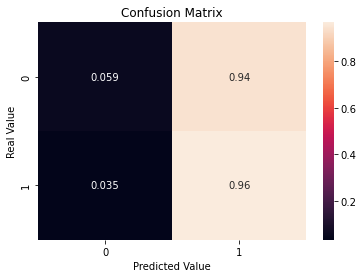

In [193]:
# final SVC model
svc = SVC(kernel='poly', C=0.0001)
svc.fit(X_train_rus, Y_train_rus)

# prediction
X_test_svc = scaler.transform(X_test)
Y_pred_svc = svc.predict(X_test_svc)

# classification report
print(classification_report(Y_test, Y_pred_svc))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, Y_pred_svc, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

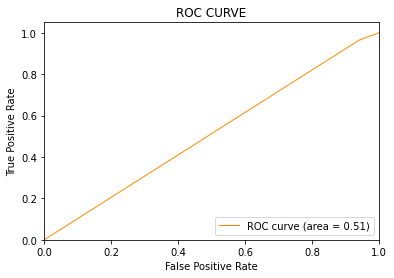

In [194]:
# Plot the ROC-AUC Curve for model-1 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_svc)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       714
           1       0.68      0.69      0.69       680

    accuracy                           0.69      1394
   macro avg       0.69      0.69      0.69      1394
weighted avg       0.69      0.69      0.69      1394



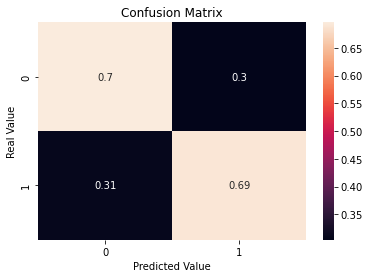

In [195]:
# final Logistic Regression model
lr = LogisticRegression(solver='liblinear', C=0.01)
lr.fit(X_train_rus, Y_train_rus)

# prediction
X_test_lr = scaler.transform(X_test)
Y_pred_lr = lr.predict(X_test_lr)

# classification report
print(classification_report(Y_test, Y_pred_lr))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, Y_pred_lr, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

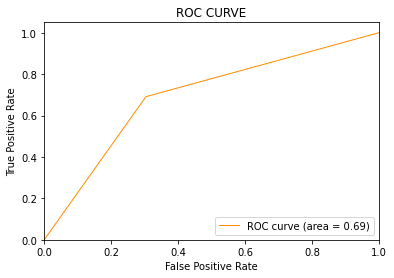

In [196]:
# Plot the ROC-AUC Curve for model-2:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_lr)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

C:\Users\Harshada\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       714
           1       0.92      0.90      0.91       680

    accuracy                           0.91      1394
   macro avg       0.91      0.91      0.91      1394
weighted avg       0.91      0.91      0.91      1394



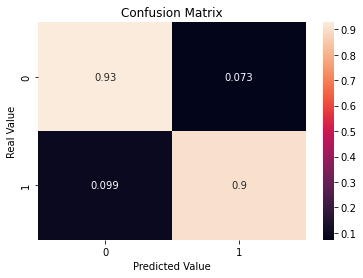

In [197]:
# final XGBoost model
xgb = XGBClassifier(learning_rate=1, n_estimators=50, max_depth=5, min_child_weight=0.2251, gamma=0)
xgb.fit(X_train_rus, Y_train_rus)

# prediction
X_test_xgb = scaler.transform(X_test)
Y_pred_xgb = xgb.predict(X_test_xgb)

# classification report
print(classification_report(Y_test, Y_pred_xgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_test, Y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

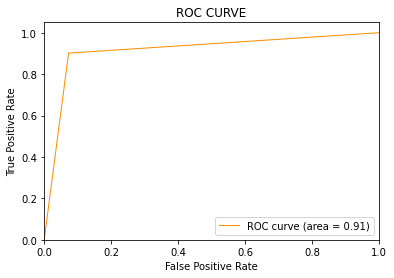

In [198]:
# Plot the ROC-AUC Curve for model-3 :
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_xgb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [229]:
from xgboost import XGBClassifier

params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 10,
            'gamma': 0.0,
            'learning_rate': 0.9,
            'n_estimators':100
        }     
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, Y_train)

[22:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.9, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [230]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.9, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [231]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

In [232]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

XGBoost model accuracy score: 0.8799


In [233]:
# define data_dmatrix
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [234]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [235]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.857396,0.006275,0.852584,0.008056
1,0.879746,0.001952,0.865700,0.009745
2,0.887159,0.006953,0.864549,0.010355
3,0.889276,0.004262,0.866539,0.006889
4,0.885480,0.002528,0.866614,0.012332


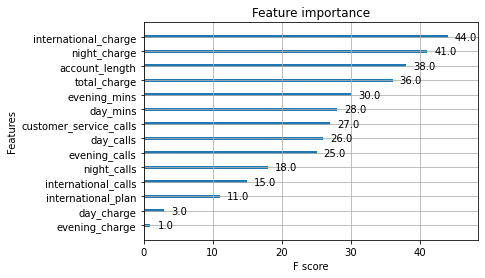

<Figure size 1152x864 with 0 Axes>

In [ ]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()